<a href="https://colab.research.google.com/github/Sowmya-Dadheech/Time_Series_Analysis/blob/main/TSA_EXP_4_Smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Exponential Smoothing**

1.   Used for Univariate data
2.   Parameter called Alpha which is a smoothing parameter
3.   SES is used to forecast future values by using weighted average of all previous values of TS.
4.   Used to predict series that have levels but no trends and seasonality.



In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
df = pd.read_csv(r'/content/AirPassengers.csv')

In [ ]:
df.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [ ]:
#Making a copy of the data for Close column for train/split
X = df['#Passengers']
test = X.iloc[-60:] #Data expected for last 30 days
train = X.iloc[:-60] #Last 30 days to evaluate prediction

In [ ]:
df

Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

**Simple Exponential Algorithm's hyperparameters**

In [ ]:
#Function for calculating evaluatiob metrics to understand how far off our forecasts are against the actuals
#Closer to 0 better the model
#RMSE and MAPE are notable statistics measures used to check the accurcy of forecasting model.

def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') #how close a regression line is to a set of points.
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}') # average magnitude of the errors in a set of predictions.
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}') #square root of the avg of squared diff bet pred and actual obs
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}') #statistical measure of how accurate a forecast is.
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') #proportion of variance in dependent variable by the independent variable

**Find the best smoothing parameter which ranges from 0 to 1.**

In [ ]:
resu = []
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(60)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE'])

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 87311.43333333333
MAE is : 284.43333333333334
RMSE is : 295.4850814057003
MAPE is : 70.6608304362107
R2 is : -12.623015217396201

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 22039.298548349176
MAE is : 125.03449657498983
RMSE is : 148.4563860140384
MAPE is : 28.90668211518547
R2 is : -2.4387443664869264

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 19419.593168650877
MAE is : 114.6214844464806
RMSE is : 139.35420039830476
MAPE is : 26.235750115981816
R2 is : -2.0299973686398562

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 19677.572522257415
MAE is : 115.67177154086333
RMSE is : 140.27677114282827
MAPE is : 26.503149144580167
R2 is : -2.0702493325096807

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 20671.695505486117
MAE is : 119.62654284186611
RMSE is : 143.77654713299424
MAPE is : 27.510018609008206
R2 is : -2.2253602

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
<ipython-input-6-dafe352bcbea>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
<ipython-input-6-dafe352bcbea>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimiz

Evaluation metric results:-
MSE is : 21322.825948286172
MAE is : 122.23210406481448
RMSE is : 146.02337466407963
MAPE is : 28.182920527942567
R2 is : -2.326954687164603

Fitting for smoothing level= 1
Evaluation metric results:-
MSE is : 20435.566666666666
MAE is : 118.7
RMSE is : 142.95302258667587
MAPE is : 27.274124388090094
R2 is : -2.1885175291221644



<ipython-input-6-dafe352bcbea>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
<ipython-input-6-dafe352bcbea>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(df3, ignore_index=True)


smoothing parameter        RMSE
2                   0.2  139.354200
3                   0.3  140.276771
10                  1.0  142.953023
4                   0.4  143.776547
9                   0.9  146.023375
5                   0.5  147.070490
8                   0.8  148.263477
1                   0.1  148.456386
6                   0.6  149.020708
7                   0.7  149.365039
0                   0.0  295.485081

The above result shows that 1.0 gives the least RMSE.

In [ ]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.2,optimized= False)
fcst_gs_pred = fitSES.forecast(60)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 19419.593168650877
MAE is : 114.6214844464806
RMSE is : 139.35420039830476
MAPE is : 26.235750115981816
R2 is : -2.0299973686398562



In [ ]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(60)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 20435.56681137979
MAE is : 118.70000057021777
RMSE is : 142.95302309283213
MAPE is : 27.274124533265333
R2 is : -2.188517551701442



In [ ]:
fitSESauto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                  endog   No. Observations:                   84
Model:             SimpleExpSmoothing   SSE                          37924.000
Optimized:                       True   AIC                            517.452
Trend:                           None   BIC                            522.314
Seasonal:                        None   AICC                           517.958
Seasonal Periods:                None   Date:                 Fri, 03 Nov 2023
Box-Cox:                        False   Time:                         18:02:51
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level              112.00000                  l.0                False
------------------------------------------------------------------------------
"""

In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(84, 144)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [ ]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(84, 144)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

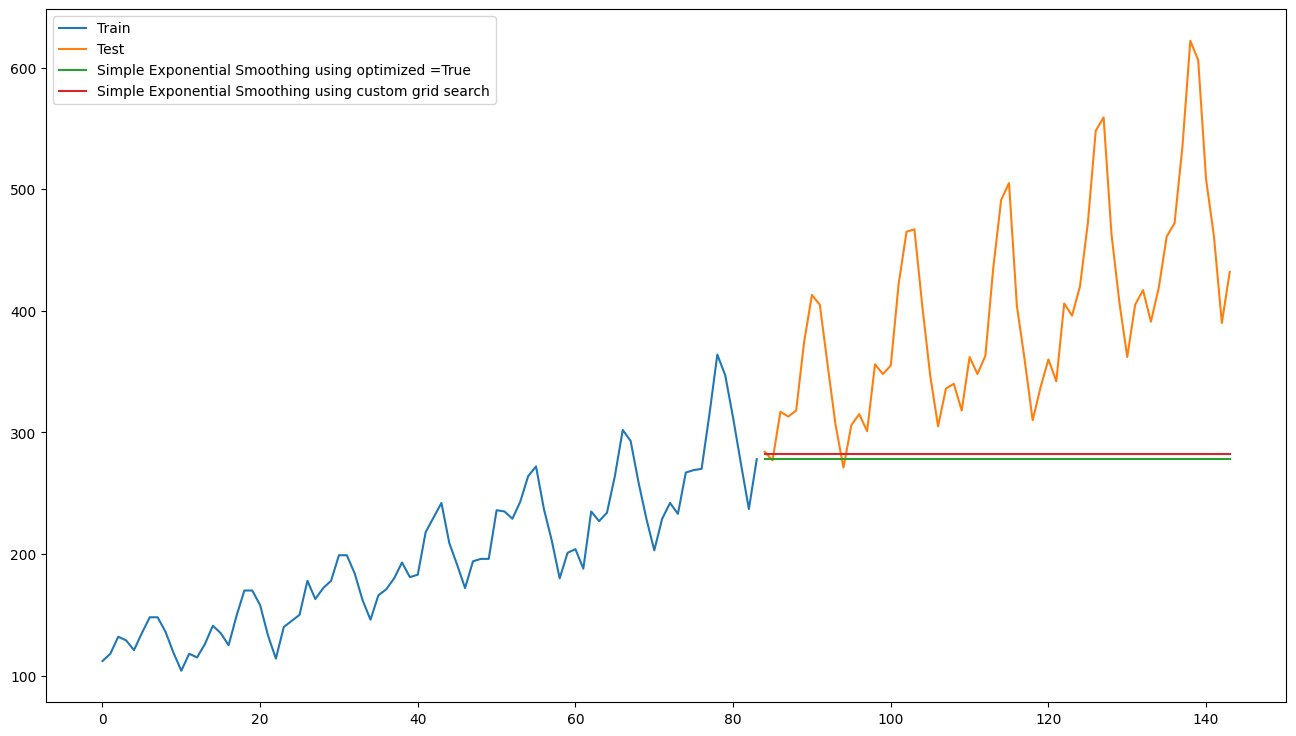

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

### Since single smoothing takes only one parameter, we can see that it is clearly not enough to forecast the seasonality and cyclicity in the dataset.

# **Double Exponential Smoothing**



1.   Handles data that consumes trends and seasonality.
2.   This method adds a time trend equation in the formulation.
3.    Two smoothing parameters are used to update these two components at a time.
4.   Also calleed as Holt's exponential smoothing that contains level, trends but no seasonality.



In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
df['Close']=df['#Passengers']

In [ ]:
train = df.Close[0:-60]
test = df.Close[-60:]

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
from sklearn.model_selection import ParameterGrid
#dampening - decreasing future time trends on a straight line(no trend)
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
#Holt Parameters:
#    endog (array-like) – Time series
#    expoential (bool, optional) – Type of trend component.
#    damped (bool, optional) – Should the trend component be damped.

In [ ]:
#fit Parameters:
#smoothing_level (float, optional) – The alpha value of the simple exponential smoothing, if the value is set then this value will be used as the value.
#smoothing_slope (float, optional) – The beta value of the holts trend method, if the value is set then this value will be used as the value.
#damping_slope (float, optional) – The phi value of the damped method, if the value is set then this value will be used as the value.
#optimized (bool, optional) – Should the values that have not been set above be optimized automatically?

In [ ]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(60)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


0.1 0.1 0.1 True
84     271.691812
85     271.692139
86     271.692172
87     271.692175
88     271.692175
89     271.692175
90     271.692175
91     271.692175
92     271.692175
93     271.692175
94     271.692175
95     271.692175
96     271.692175
97     271.692175
98     271.692175
99     271.692175
100    271.692175
101    271.692175
102    271.692175
103    271.692175
104    271.692175
105    271.692175
106    271.692175
107    271.692175
108    271.692175
109    271.692175
110    271.692175
111    271.692175
112    271.692175
113    271.692175
114    271.692175
115    271.692175
116    271.692175
117    271.692175
118    271.692175
119    271.692175
120    271.692175
121    271.692175
122    271.692175
123    271.692175
124    271.692175
125    271.692175
126    271.692175
127    271.692175
128    271.692175
129    271.692175
130    271.692175
131    271.692175
132    271.692175
133    271.692175
134    271.692175
135    271.692175
136    271.692175
137    271.692175
138    271.

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

 RMSE is 139.30919811730791
0.2 0.2 0.1 True
84     282.479827
85     282.475118
86     282.474647
87     282.474600
88     282.474596
89     282.474595
90     282.474595
91     282.474595
92     282.474595
93     282.474595
94     282.474595
95     282.474595
96     282.474595
97     282.474595
98     282.474595
99     282.474595
100    282.474595
101    282.474595
102    282.474595
103    282.474595
104    282.474595
105    282.474595
106    282.474595
107    282.474595
108    282.474595
109    282.474595
110    282.474595
111    282.474595
112    282.474595
113    282.474595
114    282.474595
115    282.474595
116    282.474595
117    282.474595
118    282.474595
119    282.474595
120    282.474595
121    282.474595
122    282.474595
123    282.474595
124    282.474595
125    282.474595
126    282.474595
127    282.474595
128    282.474595
129    282.474595
130    282.474595
131    282.474595
132    282.474595
133    282.474595
134    282.474595
135    282.474595
136    282.474595
1

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     281.126034
85     281.122599
86     281.122255
87     281.122221
88     281.122218
89     281.122217
90     281.122217
91     281.122217
92     281.122217
93     281.122217
94     281.122217
95     281.122217
96     281.122217
97     281.122217
98     281.122217
99     281.122217
100    281.122217
101    281.122217
102    281.122217
103    281.122217
104    281.122217
105    281.122217
106    281.122217
107    281.122217
108    281.122217
109    281.122217
110    281.122217
111    281.122217
112    281.122217
113    281.122217
114    281.122217
115    281.122217
116    281.122217
117    281.122217
118    281.122217
119    281.122217
120    281.122217
121    281.122217
122    281.122217
123    281.122217
124    281.122217
125    281.122217
126    281.122217
127    281.122217
128    281.122217
129    281.122217
130    281.122217
131    281.122217
132    281.122217
133    281.122217
134    281.122217
135    281.122217
136    281.122217
137    281.122217
138    281.122217
139    281

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     280.208301
85     280.182985
86     280.180454
87     280.180201
88     280.180175
89     280.180173
90     280.180172
91     280.180172
92     280.180172
93     280.180172
94     280.180172
95     280.180172
96     280.180172
97     280.180172
98     280.180172
99     280.180172
100    280.180172
101    280.180172
102    280.180172
103    280.180172
104    280.180172
105    280.180172
106    280.180172
107    280.180172
108    280.180172
109    280.180172
110    280.180172
111    280.180172
112    280.180172
113    280.180172
114    280.180172
115    280.180172
116    280.180172
117    280.180172
118    280.180172
119    280.180172
120    280.180172
121    280.180172
122    280.180172
123    280.180172
124    280.180172
125    280.180172
126    280.180172
127    280.180172
128    280.180172
129    280.180172
130    280.180172
131    280.180172
132    280.180172
133    280.180172
134    280.180172
135    280.180172
136    280.180172
137    280.180172
138    280.180172
139    280

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.4 0.7 0.1 True
84     275.553755
85     275.545136
86     275.544274
87     275.544188
88     275.544179
89     275.544178
90     275.544178
91     275.544178
92     275.544178
93     275.544178
94     275.544178
95     275.544178
96     275.544178
97     275.544178
98     275.544178
99     275.544178
100    275.544178
101    275.544178
102    275.544178
103    275.544178
104    275.544178
105    275.544178
106    275.544178
107    275.544178
108    275.544178
109    275.544178
110    275.544178
111    275.544178
112    275.544178
113    275.544178
114    275.544178
115    275.544178
116    275.544178
117    275.544178
118    275.544178
119    275.544178
120    275.544178
121    275.544178
122    275.544178
123    275.544178
124    275.544178
125    275.544178
126    275.544178
127    275.544178
128    275.544178
129    275.544178
130    275.544178
131    275.544178
132    275.544178
133    275.544178
134    275.544178
135    275.544178
136    275.544178
137    275.544178
138    275.

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

0.5 0.4 0.1 True
84     272.269633
85     272.279620
86     272.280619
87     272.280718
88     272.280728
89     272.280729
90     272.280730
91     272.280730
92     272.280730
93     272.280730
94     272.280730
95     272.280730
96     272.280730
97     272.280730
98     272.280730
99     272.280730
100    272.280730
101    272.280730
102    272.280730
103    272.280730
104    272.280730
105    272.280730
106    272.280730
107    272.280730
108    272.280730
109    272.280730
110    272.280730
111    272.280730
112    272.280730
113    272.280730
114    272.280730
115    272.280730
116    272.280730
117    272.280730
118    272.280730
119    272.280730
120    272.280730
121    272.280730
122    272.280730
123    272.280730
124    272.280730
125    272.280730
126    272.280730
127    272.280730
128    272.280730
129    272.280730
130    272.280730
131    272.280730
132    272.280730
133    272.280730
134    272.280730
135    272.280730
136    272.280730
137    272.280730
138    272.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     270.322920
85     270.337230
86     270.338661
87     270.338804
88     270.338818
89     270.338820
90     270.338820
91     270.338820
92     270.338820
93     270.338820
94     270.338820
95     270.338820
96     270.338820
97     270.338820
98     270.338820
99     270.338820
100    270.338820
101    270.338820
102    270.338820
103    270.338820
104    270.338820
105    270.338820
106    270.338820
107    270.338820
108    270.338820
109    270.338820
110    270.338820
111    270.338820
112    270.338820
113    270.338820
114    270.338820
115    270.338820
116    270.338820
117    270.338820
118    270.338820
119    270.338820
120    270.338820
121    270.338820
122    270.338820
123    270.338820
124    270.338820
125    270.338820
126    270.338820
127    270.338820
128    270.338820
129    270.338820
130    270.338820
131    270.338820
132    270.338820
133    270.338820
134    270.338820
135    270.338820
136    270.338820
137    270.338820
138    270.338820
139    270

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     270.447364
85     270.563366
86     270.574966
87     270.576126
88     270.576242
89     270.576254
90     270.576255
91     270.576255
92     270.576255
93     270.576255
94     270.576255
95     270.576255
96     270.576255
97     270.576255
98     270.576255
99     270.576255
100    270.576255
101    270.576255
102    270.576255
103    270.576255
104    270.576255
105    270.576255
106    270.576255
107    270.576255
108    270.576255
109    270.576255
110    270.576255
111    270.576255
112    270.576255
113    270.576255
114    270.576255
115    270.576255
116    270.576255
117    270.576255
118    270.576255
119    270.576255
120    270.576255
121    270.576255
122    270.576255
123    270.576255
124    270.576255
125    270.576255
126    270.576255
127    270.576255
128    270.576255
129    270.576255
130    270.576255
131    270.576255
132    270.576255
133    270.576255
134    270.576255
135    270.576255
136    270.576255
137    270.576255
138    270.576255
139    270

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     272.338118
85     272.455355
86     272.467079
87     272.468251
88     272.468369
89     272.468380
90     272.468382
91     272.468382
92     272.468382
93     272.468382
94     272.468382
95     272.468382
96     272.468382
97     272.468382
98     272.468382
99     272.468382
100    272.468382
101    272.468382
102    272.468382
103    272.468382
104    272.468382
105    272.468382
106    272.468382
107    272.468382
108    272.468382
109    272.468382
110    272.468382
111    272.468382
112    272.468382
113    272.468382
114    272.468382
115    272.468382
116    272.468382
117    272.468382
118    272.468382
119    272.468382
120    272.468382
121    272.468382
122    272.468382
123    272.468382
124    272.468382
125    272.468382
126    272.468382
127    272.468382
128    272.468382
129    272.468382
130    272.468382
131    272.468382
132    272.468382
133    272.468382
134    272.468382
135    272.468382
136    272.468382
137    272.468382
138    272.468382
139    272

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     275.091111
85     275.182317
86     275.191437
87     275.192349
88     275.192441
89     275.192450
90     275.192451
91     275.192451
92     275.192451
93     275.192451
94     275.192451
95     275.192451
96     275.192451
97     275.192451
98     275.192451
99     275.192451
100    275.192451
101    275.192451
102    275.192451
103    275.192451
104    275.192451
105    275.192451
106    275.192451
107    275.192451
108    275.192451
109    275.192451
110    275.192451
111    275.192451
112    275.192451
113    275.192451
114    275.192451
115    275.192451
116    275.192451
117    275.192451
118    275.192451
119    275.192451
120    275.192451
121    275.192451
122    275.192451
123    275.192451
124    275.192451
125    275.192451
126    275.192451
127    275.192451
128    275.192451
129    275.192451
130    275.192451
131    275.192451
132    275.192451
133    275.192451
134    275.192451
135    275.192451
136    275.192451
137    275.192451
138    275.192451
139    275

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     272.645540
85     272.644357
86     272.644120
87     272.644073
88     272.644064
89     272.644062
90     272.644061
91     272.644061
92     272.644061
93     272.644061
94     272.644061
95     272.644061
96     272.644061
97     272.644061
98     272.644061
99     272.644061
100    272.644061
101    272.644061
102    272.644061
103    272.644061
104    272.644061
105    272.644061
106    272.644061
107    272.644061
108    272.644061
109    272.644061
110    272.644061
111    272.644061
112    272.644061
113    272.644061
114    272.644061
115    272.644061
116    272.644061
117    272.644061
118    272.644061
119    272.644061
120    272.644061
121    272.644061
122    272.644061
123    272.644061
124    272.644061
125    272.644061
126    272.644061
127    272.644061
128    272.644061
129    272.644061
130    272.644061
131    272.644061
132    272.644061
133    272.644061
134    272.644061
135    272.644061
136    272.644061
137    272.644061
138    272.644061
139    272

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack


 RMSE is 145.2336826852294
0.1 0.8 0.2 True
84     275.734958
85     275.715227
86     275.711281
87     275.710492
88     275.710334
89     275.710303
90     275.710296
91     275.710295
92     275.710295
93     275.710295
94     275.710295
95     275.710295
96     275.710295
97     275.710295
98     275.710295
99     275.710295
100    275.710295
101    275.710295
102    275.710295
103    275.710295
104    275.710295
105    275.710295
106    275.710295
107    275.710295
108    275.710295
109    275.710295
110    275.710295
111    275.710295
112    275.710295
113    275.710295
114    275.710295
115    275.710295
116    275.710295
117    275.710295
118    275.710295
119    275.710295
120    275.710295
121    275.710295
122    275.710295
123    275.710295
124    275.710295
125    275.710295
126    275.710295
127    275.710295
128    275.710295
129    275.710295
130    275.710295
131    275.710295
132    275.710295
133    275.710295
134    275.710295
135    275.710295
136    275.710295
1

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     282.722803
85     282.676914
86     282.667736
87     282.665900
88     282.665533
89     282.665460
90     282.665445
91     282.665442
92     282.665442
93     282.665442
94     282.665442
95     282.665442
96     282.665441
97     282.665441
98     282.665441
99     282.665441
100    282.665441
101    282.665441
102    282.665441
103    282.665441
104    282.665441
105    282.665441
106    282.665441
107    282.665441
108    282.665441
109    282.665441
110    282.665441
111    282.665441
112    282.665441
113    282.665441
114    282.665441
115    282.665441
116    282.665441
117    282.665441
118    282.665441
119    282.665441
120    282.665441
121    282.665441
122    282.665441
123    282.665441
124    282.665441
125    282.665441
126    282.665441
127    282.665441
128    282.665441
129    282.665441
130    282.665441
131    282.665441
132    282.665441
133    282.665441
134    282.665441
135    282.665441
136    282.665441
137    282.665441
138    282.665441
139    282

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.2 0.8 0.2 True
84     282.854712
85     282.723151
86     282.696839
87     282.691577
88     282.690524
89     282.690314
90     282.690271
91     282.690263
92     282.690261
93     282.690261
94     282.690261
95     282.690261
96     282.690261
97     282.690261
98     282.690261
99     282.690261
100    282.690261
101    282.690261
102    282.690261
103    282.690261
104    282.690261
105    282.690261
106    282.690261
107    282.690261
108    282.690261
109    282.690261
110    282.690261
111    282.690261
112    282.690261
113    282.690261
114    282.690261
115    282.690261
116    282.690261
117    282.690261
118    282.690261
119    282.690261
120    282.690261
121    282.690261
122    282.690261
123    282.690261
124    282.690261
125    282.690261
126    282.690261
127    282.690261
128    282.690261
129    282.690261
130    282.690261
131    282.690261
132    282.690261
133    282.690261
134    282.690261
135    282.690261
136    282.690261
137    282.690261
138    282.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.3 0.4 0.2 True
84     280.101951
85     280.012647
86     279.994786
87     279.991214
88     279.990499
89     279.990356
90     279.990328
91     279.990322
92     279.990321
93     279.990321
94     279.990321
95     279.990321
96     279.990321
97     279.990321
98     279.990321
99     279.990321
100    279.990321
101    279.990321
102    279.990321
103    279.990321
104    279.990321
105    279.990321
106    279.990321
107    279.990321
108    279.990321
109    279.990321
110    279.990321
111    279.990321
112    279.990321
113    279.990321
114    279.990321
115    279.990321
116    279.990321
117    279.990321
118    279.990321
119    279.990321
120    279.990321
121    279.990321
122    279.990321
123    279.990321
124    279.990321
125    279.990321
126    279.990321
127    279.990321
128    279.990321
129    279.990321
130    279.990321
131    279.990321
132    279.990321
133    279.990321
134    279.990321
135    279.990321
136    279.990321
137    279.990321
138    279.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     278.725265
85     278.557536
86     278.523990
87     278.517281
88     278.515939
89     278.515671
90     278.515617
91     278.515606
92     278.515604
93     278.515604
94     278.515604
95     278.515604
96     278.515604
97     278.515604
98     278.515604
99     278.515604
100    278.515604
101    278.515604
102    278.515604
103    278.515604
104    278.515604
105    278.515604
106    278.515604
107    278.515604
108    278.515604
109    278.515604
110    278.515604
111    278.515604
112    278.515604
113    278.515604
114    278.515604
115    278.515604
116    278.515604
117    278.515604
118    278.515604
119    278.515604
120    278.515604
121    278.515604
122    278.515604
123    278.515604
124    278.515604
125    278.515604
126    278.515604
127    278.515604
128    278.515604
129    278.515604
130    278.515604
131    278.515604
132    278.515604
133    278.515604
134    278.515604
135    278.515604
136    278.515604
137    278.515604
138    278.515604
139    278

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack


 RMSE is 145.0440810039121
0.4 0.4 0.2 True
84     275.066466
85     274.997346
86     274.983523
87     274.980758
88     274.980205
89     274.980094
90     274.980072
91     274.980068
92     274.980067
93     274.980067
94     274.980067
95     274.980067
96     274.980067
97     274.980067
98     274.980067
99     274.980067
100    274.980067
101    274.980067
102    274.980067
103    274.980067
104    274.980067
105    274.980067
106    274.980067
107    274.980067
108    274.980067
109    274.980067
110    274.980067
111    274.980067
112    274.980067
113    274.980067
114    274.980067
115    274.980067
116    274.980067
117    274.980067
118    274.980067
119    274.980067
120    274.980067
121    274.980067
122    274.980067
123    274.980067
124    274.980067
125    274.980067
126    274.980067
127    274.980067
128    274.980067
129    274.980067
130    274.980067
131    274.980067
132    274.980067
133    274.980067
134    274.980067
135    274.980067
136    274.980067
1

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b6326

 RMSE is 146.69890573249342
0.4 0.8 0.2 True
84     273.154663
85     273.055002
86     273.035070
87     273.031084
88     273.030287
89     273.030127
90     273.030095
91     273.030089
92     273.030088
93     273.030087
94     273.030087
95     273.030087
96     273.030087
97     273.030087
98     273.030087
99     273.030087
100    273.030087
101    273.030087
102    273.030087
103    273.030087
104    273.030087
105    273.030087
106    273.030087
107    273.030087
108    273.030087
109    273.030087
110    273.030087
111    273.030087
112    273.030087
113    273.030087
114    273.030087
115    273.030087
116    273.030087
117    273.030087
118    273.030087
119    273.030087
120    273.030087
121    273.030087
122    273.030087
123    273.030087
124    273.030087
125    273.030087
126    273.030087
127    273.030087
128    273.030087
129    273.030087
130    273.030087
131    273.030087
132    273.030087
133    273.030087
134    273.030087
135    273.030087
136    273.030087
1

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi


0.5 0.2 0.2 True
84     272.073991
85     272.063028
86     272.060835
87     272.060397
88     272.060309
89     272.060291
90     272.060288
91     272.060287
92     272.060287
93     272.060287
94     272.060287
95     272.060287
96     272.060287
97     272.060287
98     272.060287
99     272.060287
100    272.060287
101    272.060287
102    272.060287
103    272.060287
104    272.060287
105    272.060287
106    272.060287
107    272.060287
108    272.060287
109    272.060287
110    272.060287
111    272.060287
112    272.060287
113    272.060287
114    272.060287
115    272.060287
116    272.060287
117    272.060287
118    272.060287
119    272.060287
120    272.060287
121    272.060287
122    272.060287
123    272.060287
124    272.060287
125    272.060287
126    272.060287
127    272.060287
128    272.060287
129    272.060287
130    272.060287
131    272.060287
132    272.060287
133    272.060287
134    272.060287
135    272.060287
136    272.060287
137    272.060287
138    272

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

84     270.316850
85     270.333532
86     270.336869
87     270.337536
88     270.337669
89     270.337696
90     270.337701
91     270.337703
92     270.337703
93     270.337703
94     270.337703
95     270.337703
96     270.337703
97     270.337703
98     270.337703
99     270.337703
100    270.337703
101    270.337703
102    270.337703
103    270.337703
104    270.337703
105    270.337703
106    270.337703
107    270.337703
108    270.337703
109    270.337703
110    270.337703
111    270.337703
112    270.337703
113    270.337703
114    270.337703
115    270.337703
116    270.337703
117    270.337703
118    270.337703
119    270.337703
120    270.337703
121    270.337703
122    270.337703
123    270.337703
124    270.337703
125    270.337703
126    270.337703
127    270.337703
128    270.337703
129    270.337703
130    270.337703
131    270.337703
132    270.337703
133    270.337703
134    270.337703
135    270.337703
136    270.337703
137    270.337703
138    270.337703
139    270

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

0.6 0.1 0.2 True
84     270.379317
85     270.392998
86     270.395734
87     270.396281
88     270.396391
89     270.396412
90     270.396417
91     270.396418
92     270.396418
93     270.396418
94     270.396418
95     270.396418
96     270.396418
97     270.396418
98     270.396418
99     270.396418
100    270.396418
101    270.396418
102    270.396418
103    270.396418
104    270.396418
105    270.396418
106    270.396418
107    270.396418
108    270.396418
109    270.396418
110    270.396418
111    270.396418
112    270.396418
113    270.396418
114    270.396418
115    270.396418
116    270.396418
117    270.396418
118    270.396418
119    270.396418
120    270.396418
121    270.396418
122    270.396418
123    270.396418
124    270.396418
125    270.396418
126    270.396418
127    270.396418
128    270.396418
129    270.396418
130    270.396418
131    270.396418
132    270.396418
133    270.396418
134    270.396418
135    270.396418
136    270.396418
137    270.396418
138    270.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     269.483018
85     269.572285
86     269.590138
87     269.593709
88     269.594423
89     269.594566
90     269.594594
91     269.594600
92     269.594601
93     269.594601
94     269.594601
95     269.594601
96     269.594601
97     269.594601
98     269.594601
99     269.594601
100    269.594601
101    269.594601
102    269.594601
103    269.594601
104    269.594601
105    269.594601
106    269.594601
107    269.594601
108    269.594601
109    269.594601
110    269.594601
111    269.594601
112    269.594601
113    269.594601
114    269.594601
115    269.594601
116    269.594601
117    269.594601
118    269.594601
119    269.594601
120    269.594601
121    269.594601
122    269.594601
123    269.594601
124    269.594601
125    269.594601
126    269.594601
127    269.594601
128    269.594601
129    269.594601
130    269.594601
131    269.594601
132    269.594601
133    269.594601
134    269.594601
135    269.594601
136    269.594601
137    269.594601
138    269.594601
139    269

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 RMSE is 150.4184081122291
0.6 0.9 0.2 True
84     268.655849
85     268.981856
86     269.047057
87     269.060097
88     269.062705
89     269.063227
90     269.063331
91     269.063352
92     269.063356
93     269.063357
94     269.063357
95     269.063357
96     269.063357
97     269.063357
98     269.063357
99     269.063357
100    269.063357
101    269.063357
102    269.063357
103    269.063357
104    269.063357
105    269.063357
106    269.063357
107    269.063357
108    269.063357
109    269.063357
110    269.063357
111    269.063357
112    269.063357
113    269.063357
114    269.063357
115    269.063357
116    269.063357
117    269.063357
118    269.063357
119    269.063357
120    269.063357
121    269.063357
122    269.063357
123    269.063357
124    269.063357
125    269.063357
126    269.063357
127    269.063357
128    269.063357
129    269.063357
130    269.063357
131    269.063357
132    269.063357
133    269.063357
134    269.063357
135    269.063357
136    269.063357
13

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

84     270.052546
85     270.255224
86     270.295760
87     270.303867
88     270.305489
89     270.305813
90     270.305878
91     270.305891
92     270.305893
93     270.305894
94     270.305894
95     270.305894
96     270.305894
97     270.305894
98     270.305894
99     270.305894
100    270.305894
101    270.305894
102    270.305894
103    270.305894
104    270.305894
105    270.305894
106    270.305894
107    270.305894
108    270.305894
109    270.305894
110    270.305894
111    270.305894
112    270.305894
113    270.305894
114    270.305894
115    270.305894
116    270.305894
117    270.305894
118    270.305894
119    270.305894
120    270.305894
121    270.305894
122    270.305894
123    270.305894
124    270.305894
125    270.305894
126    270.305894
127    270.305894
128    270.305894
129    270.305894
130    270.305894
131    270.305894
132    270.305894
133    270.305894
134    270.305894
135    270.305894
136    270.305894
137    270.305894
138    270.305894
139    270

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing


0.7 0.9 0.2 True
84     270.596825
85     271.197274
86     271.317364
87     271.341382
88     271.346185
89     271.347146
90     271.347338
91     271.347377
92     271.347384
93     271.347386
94     271.347386
95     271.347386
96     271.347386
97     271.347386
98     271.347386
99     271.347386
100    271.347386
101    271.347386
102    271.347386
103    271.347386
104    271.347386
105    271.347386
106    271.347386
107    271.347386
108    271.347386
109    271.347386
110    271.347386
111    271.347386
112    271.347386
113    271.347386
114    271.347386
115    271.347386
116    271.347386
117    271.347386
118    271.347386
119    271.347386
120    271.347386
121    271.347386
122    271.347386
123    271.347386
124    271.347386
125    271.347386
126    271.347386
127    271.347386
128    271.347386
129    271.347386
130    271.347386
131    271.347386
132    271.347386
133    271.347386
134    271.347386
135    271.347386
136    271.347386
137    271.347386
138    271

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.8 0.4 0.2 True
84     272.448605
85     272.773531
86     272.838516
87     272.851513
88     272.854113
89     272.854633
90     272.854737
91     272.854758
92     272.854762
93     272.854763
94     272.854763
95     272.854763
96     272.854763
97     272.854763
98     272.854763
99     272.854763
100    272.854763
101    272.854763
102    272.854763
103    272.854763
104    272.854763
105    272.854763
106    272.854763
107    272.854763
108    272.854763
109    272.854763
110    272.854763
111    272.854763
112    272.854763
113    272.854763
114    272.854763
115    272.854763
116    272.854763
117    272.854763
118    272.854763
119    272.854763
120    272.854763
121    272.854763
122    272.854763
123    272.854763
124    272.854763
125    272.854763
126    272.854763
127    272.854763
128    272.854763
129    272.854763
130    272.854763
131    272.854763
132    272.854763
133    272.854763
134    272.854763
135    272.854763
136    272.854763
137    272.854763
138    272.

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

0.8 0.9 0.2 True
84     274.373798
85     275.258037
86     275.434885
87     275.470254
88     275.477328
89     275.478743
90     275.479026
91     275.479083
92     275.479094
93     275.479096
94     275.479097
95     275.479097
96     275.479097
97     275.479097
98     275.479097
99     275.479097
100    275.479097
101    275.479097
102    275.479097
103    275.479097
104    275.479097
105    275.479097
106    275.479097
107    275.479097
108    275.479097
109    275.479097
110    275.479097
111    275.479097
112    275.479097
113    275.479097
114    275.479097
115    275.479097
116    275.479097
117    275.479097
118    275.479097
119    275.479097
120    275.479097
121    275.479097
122    275.479097
123    275.479097
124    275.479097
125    275.479097
126    275.479097
127    275.479097
128    275.479097
129    275.479097
130    275.479097
131    275.479097
132    275.479097
133    275.479097
134    275.479097
135    275.479097
136    275.479097
137    275.479097
138    275.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 RMSE is 143.37953320750213
0.9 0.6 0.2 True
84     277.368209
85     278.087058
86     278.230827
87     278.259581
88     278.265332
89     278.266482
90     278.266712
91     278.266758
92     278.266768
93     278.266769
94     278.266770
95     278.266770
96     278.266770
97     278.266770
98     278.266770
99     278.266770
100    278.266770
101    278.266770
102    278.266770
103    278.266770
104    278.266770
105    278.266770
106    278.266770
107    278.266770
108    278.266770
109    278.266770
110    278.266770
111    278.266770
112    278.266770
113    278.266770
114    278.266770
115    278.266770
116    278.266770
117    278.266770
118    278.266770
119    278.266770
120    278.266770
121    278.266770
122    278.266770
123    278.266770
124    278.266770
125    278.266770
126    278.266770
127    278.266770
128    278.266770
129    278.266770
130    278.266770
131    278.266770
132    278.266770
133    278.266770
134    278.266770
135    278.266770
136    278.266770
1

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 0.3 True
84     274.450581
85     274.431533
86     274.425819
87     274.424105
88     274.423590
89     274.423436
90     274.423390
91     274.423376
92     274.423372
93     274.423370
94     274.423370
95     274.423370
96     274.423370
97     274.423370
98     274.423370
99     274.423370
100    274.423370
101    274.423370
102    274.423370
103    274.423370
104    274.423370
105    274.423370
106    274.423370
107    274.423370
108    274.423370
109    274.423370
110    274.423370
111    274.423370
112    274.423370
113    274.423370
114    274.423370
115    274.423370
116    274.423370
117    274.423370
118    274.423370
119    274.423370
120    274.423370
121    274.423370
122    274.423370
123    274.423370
124    274.423370
125    274.423370
126    274.423370
127    274.423370
128    274.423370
129    274.423370
130    274.423370
131    274.423370
132    274.423370
133    274.423370
134    274.423370
135    274.423370
136    274.423370
137    274.423370
138    274.423370


<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

0.1 0.8 0.3 True
84     278.238613
85     278.136936
86     278.106432
87     278.097281
88     278.094536
89     278.093712
90     278.093465
91     278.093391
92     278.093369
93     278.093362
94     278.093360
95     278.093360
96     278.093359
97     278.093359
98     278.093359
99     278.093359
100    278.093359
101    278.093359
102    278.093359
103    278.093359
104    278.093359
105    278.093359
106    278.093359
107    278.093359
108    278.093359
109    278.093359
110    278.093359
111    278.093359
112    278.093359
113    278.093359
114    278.093359
115    278.093359
116    278.093359
117    278.093359
118    278.093359
119    278.093359
120    278.093359
121    278.093359
122    278.093359
123    278.093359
124    278.093359
125    278.093359
126    278.093359
127    278.093359
128    278.093359
129    278.093359
130    278.093359
131    278.093359
132    278.093359
133    278.093359
134    278.093359
135    278.093359
136    278.093359
137    278.093359
138    278.

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

 RMSE is 139.0005987447054
0.2 0.4 0.3 True
84     283.089180
85     282.888809
86     282.828698
87     282.810665
88     282.805255
89     282.803632
90     282.803145
91     282.802999
92     282.802955
93     282.802942
94     282.802938
95     282.802936
96     282.802936
97     282.802936
98     282.802936
99     282.802936
100    282.802936
101    282.802936
102    282.802936
103    282.802936
104    282.802936
105    282.802936
106    282.802936
107    282.802936
108    282.802936
109    282.802936
110    282.802936
111    282.802936
112    282.802936
113    282.802936
114    282.802936
115    282.802936
116    282.802936
117    282.802936
118    282.802936
119    282.802936
120    282.802936
121    282.802936
122    282.802936
123    282.802936
124    282.802936
125    282.802936
126    282.802936
127    282.802936
128    282.802936
129    282.802936
130    282.802936
131    282.802936
132    282.802936
133    282.802936
134    282.802936
135    282.802936
136    282.802936
13

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack


84     282.849819
85     282.415817
86     282.285616
87     282.246556
88     282.234838
89     282.231323
90     282.230268
91     282.229952
92     282.229857
93     282.229828
94     282.229820
95     282.229817
96     282.229816
97     282.229816
98     282.229816
99     282.229816
100    282.229816
101    282.229816
102    282.229816
103    282.229816
104    282.229816
105    282.229816
106    282.229816
107    282.229816
108    282.229816
109    282.229816
110    282.229816
111    282.229816
112    282.229816
113    282.229816
114    282.229816
115    282.229816
116    282.229816
117    282.229816
118    282.229816
119    282.229816
120    282.229816
121    282.229816
122    282.229816
123    282.229816
124    282.229816
125    282.229816
126    282.229816
127    282.229816
128    282.229816
129    282.229816
130    282.229816
131    282.229816
132    282.229816
133    282.229816
134    282.229816
135    282.229816
136    282.229816
137    282.229816
138    282.229816
139    28

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

84     278.698248
85     278.333782
86     278.224442
87     278.191640
88     278.181799
89     278.178847
90     278.177961
91     278.177696
92     278.177616
93     278.177592
94     278.177585
95     278.177583
96     278.177582
97     278.177582
98     278.177582
99     278.177582
100    278.177582
101    278.177582
102    278.177582
103    278.177582
104    278.177582
105    278.177582
106    278.177582
107    278.177582
108    278.177582
109    278.177582
110    278.177582
111    278.177582
112    278.177582
113    278.177582
114    278.177582
115    278.177582
116    278.177582
117    278.177582
118    278.177582
119    278.177582
120    278.177582
121    278.177582
122    278.177582
123    278.177582
124    278.177582
125    278.177582
126    278.177582
127    278.177582
128    278.177582
129    278.177582
130    278.177582
131    278.177582
132    278.177582
133    278.177582
134    278.177582
135    278.177582
136    278.177582
137    278.177582
138    278.177582
139    278

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 RMSE is 147.66900926940036
0.4 0.6 0.3 True
84     271.952121
85     271.600670
86     271.495235
87     271.463604
88     271.454115
89     271.451268
90     271.450414
91     271.450158
92     271.450081
93     271.450058
94     271.450051
95     271.450049
96     271.450049
97     271.450049
98     271.450048
99     271.450048
100    271.450048
101    271.450048
102    271.450048
103    271.450048
104    271.450048
105    271.450048
106    271.450048
107    271.450048
108    271.450048
109    271.450048
110    271.450048
111    271.450048
112    271.450048
113    271.450048
114    271.450048
115    271.450048
116    271.450048
117    271.450048
118    271.450048
119    271.450048
120    271.450048
121    271.450048
122    271.450048
123    271.450048
124    271.450048
125    271.450048
126    271.450048
127    271.450048
128    271.450048
129    271.450048
130    271.450048
131    271.450048
132    271.450048
133    271.450048
134    271.450048
135    271.450048
136    271.450048
1

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing


 RMSE is 149.40911494070843
0.5 0.4 0.3 True
84     269.662597
85     269.530572
86     269.490965
87     269.479083
88     269.475518
89     269.474449
90     269.474128
91     269.474032
92     269.474003
93     269.473994
94     269.473991
95     269.473991
96     269.473990
97     269.473990
98     269.473990
99     269.473990
100    269.473990
101    269.473990
102    269.473990
103    269.473990
104    269.473990
105    269.473990
106    269.473990
107    269.473990
108    269.473990
109    269.473990
110    269.473990
111    269.473990
112    269.473990
113    269.473990
114    269.473990
115    269.473990
116    269.473990
117    269.473990
118    269.473990
119    269.473990
120    269.473990
121    269.473990
122    269.473990
123    269.473990
124    269.473990
125    269.473990
126    269.473990
127    269.473990
128    269.473990
129    269.473990
130    269.473990
131    269.473990
132    269.473990
133    269.473990
134    269.473990
135    269.473990
136    269.473990


<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.5 0.9 0.3 True
84     266.499062
85     266.555534
86     266.572475
87     266.577558
88     266.579083
89     266.579540
90     266.579677
91     266.579718
92     266.579731
93     266.579734
94     266.579736
95     266.579736
96     266.579736
97     266.579736
98     266.579736
99     266.579736
100    266.579736
101    266.579736
102    266.579736
103    266.579736
104    266.579736
105    266.579736
106    266.579736
107    266.579736
108    266.579736
109    266.579736
110    266.579736
111    266.579736
112    266.579736
113    266.579736
114    266.579736
115    266.579736
116    266.579736
117    266.579736
118    266.579736
119    266.579736
120    266.579736
121    266.579736
122    266.579736
123    266.579736
124    266.579736
125    266.579736
126    266.579736
127    266.579736
128    266.579736
129    266.579736
130    266.579736
131    266.579736
132    266.579736
133    266.579736
134    266.579736
135    266.579736
136    266.579736
137    266.579736
138    266.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.6 0.4 0.3 True
84     268.304824
85     268.386236
86     268.410659
87     268.417986
88     268.420184
89     268.420844
90     268.421042
91     268.421101
92     268.421119
93     268.421124
94     268.421126
95     268.421126
96     268.421126
97     268.421126
98     268.421126
99     268.421126
100    268.421126
101    268.421126
102    268.421126
103    268.421126
104    268.421126
105    268.421126
106    268.421126
107    268.421126
108    268.421126
109    268.421126
110    268.421126
111    268.421126
112    268.421126
113    268.421126
114    268.421126
115    268.421126
116    268.421126
117    268.421126
118    268.421126
119    268.421126
120    268.421126
121    268.421126
122    268.421126
123    268.421126
124    268.421126
125    268.421126
126    268.421126
127    268.421126
128    268.421126
129    268.421126
130    268.421126
131    268.421126
132    268.421126
133    268.421126
134    268.421126
135    268.421126
136    268.421126
137    268.421126
138    268.

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

 RMSE is 151.33308417337025
0.7 0.1 0.3 True
84     269.947555
85     269.992779
86     270.006346
87     270.010417
88     270.011638
89     270.012004
90     270.012114
91     270.012147
92     270.012157
93     270.012160
94     270.012161
95     270.012161
96     270.012161
97     270.012161
98     270.012161
99     270.012161
100    270.012161
101    270.012161
102    270.012161
103    270.012161
104    270.012161
105    270.012161
106    270.012161
107    270.012161
108    270.012161
109    270.012161
110    270.012161
111    270.012161
112    270.012161
113    270.012161
114    270.012161
115    270.012161
116    270.012161
117    270.012161
118    270.012161
119    270.012161
120    270.012161
121    270.012161
122    270.012161
123    270.012161
124    270.012161
125    270.012161
126    270.012161
127    270.012161
128    270.012161
129    270.012161
130    270.012161
131    270.012161
132    270.012161
133    270.012161
134    270.012161
135    270.012161
136    270.012161
1

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi


0.7 0.4 0.3 True
84     269.400431
85     269.740045
86     269.841929
87     269.872494
88     269.881664
89     269.884415
90     269.885240
91     269.885488
92     269.885562
93     269.885584
94     269.885591
95     269.885593
96     269.885593
97     269.885594
98     269.885594
99     269.885594
100    269.885594
101    269.885594
102    269.885594
103    269.885594
104    269.885594
105    269.885594
106    269.885594
107    269.885594
108    269.885594
109    269.885594
110    269.885594
111    269.885594
112    269.885594
113    269.885594
114    269.885594
115    269.885594
116    269.885594
117    269.885594
118    269.885594
119    269.885594
120    269.885594
121    269.885594
122    269.885594
123    269.885594
124    269.885594
125    269.885594
126    269.885594
127    269.885594
128    269.885594
129    269.885594
130    269.885594
131    269.885594
132    269.885594
133    269.885594
134    269.885594
135    269.885594
136    269.885594
137    269.885594
138    269

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 RMSE is 148.32989724739335
0.7 0.9 0.3 True
84     270.425732
85     271.725412
86     272.115316
87     272.232287
88     272.267378
89     272.277906
90     272.281064
91     272.282012
92     272.282296
93     272.282381
94     272.282407
95     272.282414
96     272.282417
97     272.282417
98     272.282418
99     272.282418
100    272.282418
101    272.282418
102    272.282418
103    272.282418
104    272.282418
105    272.282418
106    272.282418
107    272.282418
108    272.282418
109    272.282418
110    272.282418
111    272.282418
112    272.282418
113    272.282418
114    272.282418
115    272.282418
116    272.282418
117    272.282418
118    272.282418
119    272.282418
120    272.282418
121    272.282418
122    272.282418
123    272.282418
124    272.282418
125    272.282418
126    272.282418
127    272.282418
128    272.282418
129    272.282418
130    272.282418
131    272.282418
132    272.282418
133    272.282418
134    272.282418
135    272.282418
136    272.282418
1

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 RMSE is 145.48693312003067
0.8 0.7 0.3 True
84     274.044057
85     275.401202
86     275.808345
87     275.930488
88     275.967131
89     275.978124
90     275.981422
91     275.982411
92     275.982708
93     275.982797
94     275.982824
95     275.982832
96     275.982834
97     275.982835
98     275.982835
99     275.982835
100    275.982835
101    275.982835
102    275.982835
103    275.982835
104    275.982835
105    275.982835
106    275.982835
107    275.982835
108    275.982835
109    275.982835
110    275.982835
111    275.982835
112    275.982835
113    275.982835
114    275.982835
115    275.982835
116    275.982835
117    275.982835
118    275.982835
119    275.982835
120    275.982835
121    275.982835
122    275.982835
123    275.982835
124    275.982835
125    275.982835
126    275.982835
127    275.982835
128    275.982835
129    275.982835
130    275.982835
131    275.982835
132    275.982835
133    275.982835
134    275.982835
135    275.982835
136    275.982835
1

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     276.718545
85     277.620039
86     277.890488
87     277.971622
88     277.995962
89     278.003264
90     278.005455
91     278.006112
92     278.006309
93     278.006369
94     278.006386
95     278.006392
96     278.006393
97     278.006394
98     278.006394
99     278.006394
100    278.006394
101    278.006394
102    278.006394
103    278.006394
104    278.006394
105    278.006394
106    278.006394
107    278.006394
108    278.006394
109    278.006394
110    278.006394
111    278.006394
112    278.006394
113    278.006394
114    278.006394
115    278.006394
116    278.006394
117    278.006394
118    278.006394
119    278.006394
120    278.006394
121    278.006394
122    278.006394
123    278.006394
124    278.006394
125    278.006394
126    278.006394
127    278.006394
128    278.006394
129    278.006394
130    278.006394
131    278.006394
132    278.006394
133    278.006394
134    278.006394
135    278.006394
136    278.006394
137    278.006394
138    278.006394
139    278

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b6326

0.1 0.4 0.4 True
84     277.277867
85     277.191712
86     277.157251
87     277.143466
88     277.137952
89     277.135746
90     277.134864
91     277.134511
92     277.134370
93     277.134314
94     277.134291
95     277.134282
96     277.134278
97     277.134277
98     277.134276
99     277.134276
100    277.134276
101    277.134276
102    277.134276
103    277.134276
104    277.134276
105    277.134276
106    277.134276
107    277.134276
108    277.134276
109    277.134276
110    277.134276
111    277.134276
112    277.134276
113    277.134276
114    277.134276
115    277.134276
116    277.134276
117    277.134276
118    277.134276
119    277.134276
120    277.134276
121    277.134276
122    277.134276
123    277.134276
124    277.134276
125    277.134276
126    277.134276
127    277.134276
128    277.134276
129    277.134276
130    277.134276
131    277.134276
132    277.134276
133    277.134276
134    277.134276
135    277.134276
136    277.134276
137    277.134276
138    277.

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b6326

0.4 True
84     283.487083
85     283.148310
86     283.012801
87     282.958597
88     282.936916
89     282.928243
90     282.924774
91     282.923387
92     282.922832
93     282.922610
94     282.922521
95     282.922485
96     282.922471
97     282.922465
98     282.922463
99     282.922462
100    282.922462
101    282.922462
102    282.922462
103    282.922462
104    282.922462
105    282.922462
106    282.922462
107    282.922462
108    282.922462
109    282.922462
110    282.922462
111    282.922462
112    282.922462
113    282.922462
114    282.922462
115    282.922462
116    282.922462
117    282.922462
118    282.922462
119    282.922462
120    282.922462
121    282.922462
122    282.922462
123    282.922462
124    282.922462
125    282.922462
126    282.922462
127    282.922462
128    282.922462
129    282.922462
130    282.922462
131    282.922462
132    282.922462
133    282.922462
134    282.922462
135    282.922462
136    282.922462
137    282.922462
138    282.922462
1

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     280.738681
85     280.565962
86     280.496874
87     280.469239
88     280.458185
89     280.453763
90     280.451995
91     280.451287
92     280.451004
93     280.450891
94     280.450846
95     280.450828
96     280.450821
97     280.450818
98     280.450817
99     280.450816
100    280.450816
101    280.450816
102    280.450816
103    280.450816
104    280.450816
105    280.450816
106    280.450816
107    280.450816
108    280.450816
109    280.450816
110    280.450816
111    280.450816
112    280.450816
113    280.450816
114    280.450816
115    280.450816
116    280.450816
117    280.450816
118    280.450816
119    280.450816
120    280.450816
121    280.450816
122    280.450816
123    280.450816
124    280.450816
125    280.450816
126    280.450816
127    280.450816
128    280.450816
129    280.450816
130    280.450816
131    280.450816
132    280.450816
133    280.450816
134    280.450816
135    280.450816
136    280.450816
137    280.450816
138    280.450816
139    280

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b6326

0.3 0.7 0.4 True
84     275.198319
85     273.986300
86     273.501493
87     273.307570
88     273.230001
89     273.198973
90     273.186562
91     273.181597
92     273.179612
93     273.178817
94     273.178500
95     273.178372
96     273.178322
97     273.178301
98     273.178293
99     273.178290
100    273.178289
101    273.178288
102    273.178288
103    273.178288
104    273.178288
105    273.178288
106    273.178288
107    273.178288
108    273.178288
109    273.178288
110    273.178288
111    273.178288
112    273.178288
113    273.178288
114    273.178288
115    273.178288
116    273.178288
117    273.178288
118    273.178288
119    273.178288
120    273.178288
121    273.178288
122    273.178288
123    273.178288
124    273.178288
125    273.178288
126    273.178288
127    273.178288
128    273.178288
129    273.178288
130    273.178288
131    273.178288
132    273.178288
133    273.178288
134    273.178288
135    273.178288
136    273.178288
137    273.178288
138    273.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     271.900632
85     271.192419
86     270.909133
87     270.795819
88     270.750494
89     270.732363
90     270.725111
91     270.722210
92     270.721050
93     270.720586
94     270.720400
95     270.720326
96     270.720296
97     270.720284
98     270.720280
99     270.720278
100    270.720277
101    270.720277
102    270.720277
103    270.720276
104    270.720276
105    270.720276
106    270.720276
107    270.720276
108    270.720276
109    270.720276
110    270.720276
111    270.720276
112    270.720276
113    270.720276
114    270.720276
115    270.720276
116    270.720276
117    270.720276
118    270.720276
119    270.720276
120    270.720276
121    270.720276
122    270.720276
123    270.720276
124    270.720276
125    270.720276
126    270.720276
127    270.720276
128    270.720276
129    270.720276
130    270.720276
131    270.720276
132    270.720276
133    270.720276
134    270.720276
135    270.720276
136    270.720276
137    270.720276
138    270.720276
139    270

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

 0.4 True
84     267.734843
85     267.252885
86     267.060102
87     266.982989
88     266.952144
89     266.939806
90     266.934870
91     266.932896
92     266.932107
93     266.931791
94     266.931664
95     266.931614
96     266.931594
97     266.931586
98     266.931582
99     266.931581
100    266.931581
101    266.931580
102    266.931580
103    266.931580
104    266.931580
105    266.931580
106    266.931580
107    266.931580
108    266.931580
109    266.931580
110    266.931580
111    266.931580
112    266.931580
113    266.931580
114    266.931580
115    266.931580
116    266.931580
117    266.931580
118    266.931580
119    266.931580
120    266.931580
121    266.931580
122    266.931580
123    266.931580
124    266.931580
125    266.931580
126    266.931580
127    266.931580
128    266.931580
129    266.931580
130    266.931580
131    266.931580
132    266.931580
133    266.931580
134    266.931580
135    266.931580
136    266.931580
137    266.931580
138    266.931580


<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

 True
84     267.478852
85     267.319651
86     267.255970
87     267.230498
88     267.220309
89     267.216234
90     267.214604
91     267.213952
92     267.213691
93     267.213586
94     267.213545
95     267.213528
96     267.213521
97     267.213519
98     267.213518
99     267.213517
100    267.213517
101    267.213517
102    267.213517
103    267.213517
104    267.213517
105    267.213517
106    267.213517
107    267.213517
108    267.213517
109    267.213517
110    267.213517
111    267.213517
112    267.213517
113    267.213517
114    267.213517
115    267.213517
116    267.213517
117    267.213517
118    267.213517
119    267.213517
120    267.213517
121    267.213517
122    267.213517
123    267.213517
124    267.213517
125    267.213517
126    267.213517
127    267.213517
128    267.213517
129    267.213517
130    267.213517
131    267.213517
132    267.213517
133    267.213517
134    267.213517
135    267.213517
136    267.213517
137    267.213517
138    267.213517
139 

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     268.939782
85     268.984776
86     269.002774
87     269.009973
88     269.012853
89     269.014004
90     269.014465
91     269.014650
92     269.014723
93     269.014753
94     269.014765
95     269.014769
96     269.014771
97     269.014772
98     269.014772
99     269.014772
100    269.014772
101    269.014772
102    269.014772
103    269.014772
104    269.014772
105    269.014772
106    269.014772
107    269.014772
108    269.014772
109    269.014772
110    269.014772
111    269.014772
112    269.014772
113    269.014772
114    269.014772
115    269.014772
116    269.014772
117    269.014772
118    269.014772
119    269.014772
120    269.014772
121    269.014772
122    269.014772
123    269.014772
124    269.014772
125    269.014772
126    269.014772
127    269.014772
128    269.014772
129    269.014772
130    269.014772
131    269.014772
132    269.014772
133    269.014772
134    269.014772
135    269.014772
136    269.014772
137    269.014772
138    269.014772
139    269

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b6326

 RMSE is 146.53176174488888
0.8 0.1 0.4 True
84     271.385901
85     271.484535
86     271.523988
87     271.539769
88     271.546082
89     271.548607
90     271.549617
91     271.550021
92     271.550183
93     271.550247
94     271.550273
95     271.550283
96     271.550288
97     271.550289
98     271.550290
99     271.550290
100    271.550290
101    271.550290
102    271.550290
103    271.550290
104    271.550290
105    271.550290
106    271.550290
107    271.550290
108    271.550290
109    271.550290
110    271.550290
111    271.550290
112    271.550290
113    271.550290
114    271.550290
115    271.550290
116    271.550290
117    271.550290
118    271.550290
119    271.550290
120    271.550290
121    271.550290
122    271.550290
123    271.550290
124    271.550290
125    271.550290
126    271.550290
127    271.550290
128    271.550290
129    271.550290
130    271.550290
131    271.550290
132    271.550290
133    271.550290
134    271.550290
135    271.550290
136    271.550290
1

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

 0.8 0.4 True
84     275.402618
85     278.206180
86     279.327605
87     279.776175
88     279.955603
89     280.027374
90     280.056082
91     280.067566
92     280.072159
93     280.073996
94     280.074731
95     280.075025
96     280.075143
97     280.075190
98     280.075209
99     280.075216
100    280.075219
101    280.075220
102    280.075221
103    280.075221
104    280.075221
105    280.075221
106    280.075221
107    280.075221
108    280.075221
109    280.075221
110    280.075221
111    280.075221
112    280.075221
113    280.075221
114    280.075221
115    280.075221
116    280.075221
117    280.075221
118    280.075221
119    280.075221
120    280.075221
121    280.075221
122    280.075221
123    280.075221
124    280.075221
125    280.075221
126    280.075221
127    280.075221
128    280.075221
129    280.075221
130    280.075221
131    280.075221
132    280.075221
133    280.075221
134    280.075221
135    280.075221
136    280.075221
137    280.075221
138    280.075

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 RMSE is 138.393076826263
0.9 0.7 0.4 True
84     280.851886
85     283.995456
86     285.252884
87     285.755855
88     285.957044
89     286.037519
90     286.069709
91     286.082585
92     286.087736
93     286.089796
94     286.090620
95     286.090950
96     286.091082
97     286.091134
98     286.091155
99     286.091164
100    286.091167
101    286.091169
102    286.091169
103    286.091169
104    286.091169
105    286.091169
106    286.091169
107    286.091169
108    286.091169
109    286.091169
110    286.091169
111    286.091169
112    286.091169
113    286.091169
114    286.091169
115    286.091169
116    286.091169
117    286.091169
118    286.091169
119    286.091169
120    286.091169
121    286.091169
122    286.091169
123    286.091169
124    286.091169
125    286.091169
126    286.091169
127    286.091169
128    286.091169
129    286.091169
130    286.091169
131    286.091169
132    286.091169
133    286.091169
134    286.091169
135    286.091169
136    286.091169
137

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     282.584972
85     282.221189
86     282.039297
87     281.948351
88     281.902879
89     281.880142
90     281.868774
91     281.863090
92     281.860248
93     281.858827
94     281.858116
95     281.857761
96     281.857583
97     281.857494
98     281.857450
99     281.857428
100    281.857417
101    281.857411
102    281.857408
103    281.857407
104    281.857406
105    281.857406
106    281.857406
107    281.857406
108    281.857406
109    281.857406
110    281.857406
111    281.857406
112    281.857406
113    281.857406
114    281.857406
115    281.857406
116    281.857406
117    281.857406
118    281.857406
119    281.857406
120    281.857406
121    281.857406
122    281.857406
123    281.857406
124    281.857406
125    281.857406
126    281.857406
127    281.857406
128    281.857406
129    281.857406
130    281.857406
131    281.857406
132    281.857406
133    281.857406
134    281.857406
135    281.857406
136    281.857406
137    281.857406
138    281.857406
139    281

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing


 RMSE is 139.84888063299204
0.2 0.6 0.5 True
84     283.803560
85     282.273818
86     281.508947
87     281.126511
88     280.935294
89     280.839685
90     280.791880
91     280.767978
92     280.756027
93     280.750051
94     280.747064
95     280.745570
96     280.744823
97     280.744449
98     280.744263
99     280.744169
100    280.744122
101    280.744099
102    280.744087
103    280.744082
104    280.744079
105    280.744077
106    280.744077
107    280.744076
108    280.744076
109    280.744076
110    280.744076
111    280.744076
112    280.744076
113    280.744076
114    280.744076
115    280.744076
116    280.744076
117    280.744076
118    280.744076
119    280.744076
120    280.744076
121    280.744076
122    280.744076
123    280.744076
124    280.744076
125    280.744076
126    280.744076
127    280.744076
128    280.744076
129    280.744076
130    280.744076
131    280.744076
132    280.744076
133    280.744076
134    280.744076
135    280.744076
136    280.744076


<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

0.4 0.1 0.5 True
84     275.478020
85     275.076767
86     274.876141
87     274.775827
88     274.725671
89     274.700592
90     274.688053
91     274.681784
92     274.678649
93     274.677081
94     274.676298
95     274.675906
96     274.675710
97     274.675612
98     274.675563
99     274.675539
100    274.675526
101    274.675520
102    274.675517
103    274.675516
104    274.675515
105    274.675514
106    274.675514
107    274.675514
108    274.675514
109    274.675514
110    274.675514
111    274.675514
112    274.675514
113    274.675514
114    274.675514
115    274.675514
116    274.675514
117    274.675514
118    274.675514
119    274.675514
120    274.675514
121    274.675514
122    274.675514
123    274.675514
124    274.675514
125    274.675514
126    274.675514
127    274.675514
128    274.675514
129    274.675514
130    274.675514
131    274.675514
132    274.675514
133    274.675514
134    274.675514
135    274.675514
136    274.675514
137    274.675514
138    274.

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

84     263.629278
85     262.333057
86     261.684947
87     261.360892
88     261.198864
89     261.117850
90     261.077344
91     261.057090
92     261.046963
93     261.041900
94     261.039368
95     261.038102
96     261.037470
97     261.037153
98     261.036995
99     261.036916
100    261.036876
101    261.036856
102    261.036847
103    261.036842
104    261.036839
105    261.036838
106    261.036837
107    261.036837
108    261.036837
109    261.036837
110    261.036837
111    261.036837
112    261.036837
113    261.036837
114    261.036837
115    261.036837
116    261.036837
117    261.036837
118    261.036837
119    261.036837
120    261.036837
121    261.036837
122    261.036837
123    261.036837
124    261.036837
125    261.036837
126    261.036837
127    261.036837
128    261.036837
129    261.036837
130    261.036837
131    261.036837
132    261.036837
133    261.036837
134    261.036837
135    261.036837
136    261.036837
137    261.036837
138    261.036837
139    261

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

 0.5 True
84     268.992092
85     268.815645
86     268.727421
87     268.683309
88     268.661253
89     268.650225
90     268.644711
91     268.641954
92     268.640576
93     268.639886
94     268.639542
95     268.639369
96     268.639283
97     268.639240
98     268.639219
99     268.639208
100    268.639202
101    268.639200
102    268.639198
103    268.639198
104    268.639197
105    268.639197
106    268.639197
107    268.639197
108    268.639197
109    268.639197
110    268.639197
111    268.639197
112    268.639197
113    268.639197
114    268.639197
115    268.639197
116    268.639197
117    268.639197
118    268.639197
119    268.639197
120    268.639197
121    268.639197
122    268.639197
123    268.639197
124    268.639197
125    268.639197
126    268.639197
127    268.639197
128    268.639197
129    268.639197
130    268.639197
131    268.639197
132    268.639197
133    268.639197
134    268.639197
135    268.639197
136    268.639197
137    268.639197
138    268.639197


<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.8 0.5 0.5 True
84     271.802947
85     273.374006
86     274.159535
87     274.552300
88     274.748682
89     274.846873
90     274.895969
91     274.920517
92     274.932790
93     274.938927
94     274.941996
95     274.943530
96     274.944297
97     274.944681
98     274.944873
99     274.944968
100    274.945016
101    274.945040
102    274.945052
103    274.945058
104    274.945061
105    274.945063
106    274.945064
107    274.945064
108    274.945064
109    274.945064
110    274.945064
111    274.945064
112    274.945064
113    274.945064
114    274.945064
115    274.945064
116    274.945064
117    274.945064
118    274.945064
119    274.945064
120    274.945064
121    274.945064
122    274.945064
123    274.945064
124    274.945064
125    274.945064
126    274.945064
127    274.945064
128    274.945064
129    274.945064
130    274.945064
131    274.945064
132    274.945064
133    274.945064
134    274.945064
135    274.945064
136    274.945064
137    274.945064
138    274.

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

0.9 0.9 0.5 True
84     286.394151
85     293.423317
86     296.937900
87     298.695191
88     299.573837
89     300.013160
90     300.232821
91     300.342652
92     300.397567
93     300.425025
94     300.438754
95     300.445618
96     300.449051
97     300.450767
98     300.451625
99     300.452054
100    300.452268
101    300.452376
102    300.452429
103    300.452456
104    300.452469
105    300.452476
106    300.452479
107    300.452481
108    300.452482
109    300.452482
110    300.452483
111    300.452483
112    300.452483
113    300.452483
114    300.452483
115    300.452483
116    300.452483
117    300.452483
118    300.452483
119    300.452483
120    300.452483
121    300.452483
122    300.452483
123    300.452483
124    300.452483
125    300.452483
126    300.452483
127    300.452483
128    300.452483
129    300.452483
130    300.452483
131    300.452483
132    300.452483
133    300.452483
134    300.452483
135    300.452483
136    300.452483
137    300.452483
138    300.

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

0.2 0.4 0.6 True
84     285.838470
85     284.270238
86     283.329298
87     282.764735
88     282.425997
89     282.222754
90     282.100808
91     282.027641
92     281.983740
93     281.957400
94     281.941596
95     281.932113
96     281.926424
97     281.923010
98     281.920962
99     281.919733
100    281.918996
101    281.918553
102    281.918288
103    281.918128
104    281.918033
105    281.917975
106    281.917941
107    281.917920
108    281.917908
109    281.917901
110    281.917896
111    281.917893
112    281.917892
113    281.917891
114    281.917890
115    281.917890
116    281.917890
117    281.917890
118    281.917890
119    281.917890
120    281.917890
121    281.917889
122    281.917889
123    281.917889
124    281.917889
125    281.917889
126    281.917889
127    281.917889
128    281.917889
129    281.917889
130    281.917889
131    281.917889
132    281.917889
133    281.917889
134    281.917889
135    281.917889
136    281.917889
137    281.917889
138    281.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     259.997418
85     257.287603
86     255.661715
87     254.686181
88     254.100861
89     253.749669
90     253.538954
91     253.412525
92     253.336668
93     253.291153
94     253.263845
95     253.247459
96     253.237628
97     253.231729
98     253.228190
99     253.226067
100    253.224793
101    253.224028
102    253.223570
103    253.223294
104    253.223129
105    253.223030
106    253.222971
107    253.222935
108    253.222914
109    253.222901
110    253.222893
111    253.222888
112    253.222886
113    253.222884
114    253.222883
115    253.222882
116    253.222882
117    253.222882
118    253.222882
119    253.222882
120    253.222882
121    253.222882
122    253.222882
123    253.222881
124    253.222881
125    253.222881
126    253.222881
127    253.222881
128    253.222881
129    253.222881
130    253.222881
131    253.222881
132    253.222881
133    253.222881
134    253.222881
135    253.222881
136    253.222881
137    253.222881
138    253.222881
139    253

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     271.908578
85     274.673319
86     276.332164
87     277.327470
88     277.924654
89     278.282965
90     278.497951
91     278.626942
92     278.704338
93     278.750775
94     278.778637
95     278.795354
96     278.805384
97     278.811403
98     278.815014
99     278.817180
100    278.818480
101    278.819260
102    278.819728
103    278.820009
104    278.820177
105    278.820278
106    278.820339
107    278.820376
108    278.820397
109    278.820410
110    278.820418
111    278.820423
112    278.820426
113    278.820428
114    278.820429
115    278.820429
116    278.820430
117    278.820430
118    278.820430
119    278.820430
120    278.820430
121    278.820430
122    278.820430
123    278.820430
124    278.820430
125    278.820430
126    278.820430
127    278.820430
128    278.820430
129    278.820430
130    278.820430
131    278.820430
132    278.820430
133    278.820430
134    278.820430
135    278.820430
136    278.820430
137    278.820430
138    278.820430
139    278

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

84     281.594659
85     281.749354
86     281.857641
87     281.933441
88     281.986502
89     282.023644
90     282.049644
91     282.067843
92     282.080583
93     282.089501
94     282.095744
95     282.100113
96     282.103172
97     282.105313
98     282.106812
99     282.107861
100    282.108596
101    282.109110
102    282.109470
103    282.109722
104    282.109898
105    282.110021
106    282.110108
107    282.110168
108    282.110211
109    282.110240
110    282.110261
111    282.110276
112    282.110286
113    282.110293
114    282.110298
115    282.110301
116    282.110304
117    282.110305
118    282.110307
119    282.110307
120    282.110308
121    282.110308
122    282.110309
123    282.110309
124    282.110309
125    282.110309
126    282.110309
127    282.110309
128    282.110309
129    282.110309
130    282.110309
131    282.110309
132    282.110309
133    282.110309
134    282.110309
135    282.110309
136    282.110309
137    282.110309
138    282.110309
139    282

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     286.674442
85     282.263184
86     279.175304
87     277.013788
88     275.500726
89     274.441583
90     273.700183
91     273.181203
92     272.817917
93     272.563617
94     272.385607
95     272.261000
96     272.173775
97     272.112717
98     272.069977
99     272.040059
100    272.019116
101    272.004456
102    271.994194
103    271.987011
104    271.981983
105    271.978463
106    271.975999
107    271.974274
108    271.973067
109    271.972222
110    271.971630
111    271.971216
112    271.970926
113    271.970723
114    271.970581
115    271.970482
116    271.970412
117    271.970364
118    271.970329
119    271.970306
120    271.970289
121    271.970277
122    271.970269
123    271.970263
124    271.970259
125    271.970256
126    271.970254
127    271.970253
128    271.970252
129    271.970251
130    271.970251
131    271.970251
132    271.970250
133    271.970250
134    271.970250
135    271.970250
136    271.970250
137    271.970250
138    271.970250
139    271

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.4 0.3 0.7 True
84     269.041703
85     265.467800
86     262.966068
87     261.214856
88     259.989007
89     259.130913
90     258.530247
91     258.109781
92     257.815455
93     257.609427
94     257.465207
95     257.364253
96     257.293585
97     257.244118
98     257.209490
99     257.185251
100    257.168284
101    257.156407
102    257.148093
103    257.142273
104    257.138199
105    257.135348
106    257.133351
107    257.131954
108    257.130976
109    257.130291
110    257.129812
111    257.129476
112    257.129242
113    257.129077
114    257.128962
115    257.128882
116    257.128825
117    257.128786
118    257.128758
119    257.128739
120    257.128725
121    257.128716
122    257.128709
123    257.128704
124    257.128701
125    257.128699
126    257.128697
127    257.128696
128    257.128695
129    257.128695
130    257.128695
131    257.128694
132    257.128694
133    257.128694
134    257.128694
135    257.128694
136    257.128694
137    257.128694
138    257.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.7 0.2 0.7 True
84     265.145929
85     263.520802
86     262.383213
87     261.586901
88     261.029482
89     260.639289
90     260.366154
91     260.174960
92     260.041123
93     259.947438
94     259.881858
95     259.835953
96     259.803819
97     259.781325
98     259.765579
99     259.754557
100    259.746842
101    259.741441
102    259.737660
103    259.735014
104    259.733161
105    259.731865
106    259.730957
107    259.730322
108    259.729877
109    259.729566
110    259.729348
111    259.729195
112    259.729088
113    259.729013
114    259.728961
115    259.728925
116    259.728899
117    259.728881
118    259.728868
119    259.728860
120    259.728853
121    259.728849
122    259.728846
123    259.728844
124    259.728842
125    259.728841
126    259.728841
127    259.728840
128    259.728840
129    259.728840
130    259.728839
131    259.728839
132    259.728839
133    259.728839
134    259.728839
135    259.728839
136    259.728839
137    259.728839
138    259.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.8 0.7 0.7 True
84     272.797250
85     277.718244
86     281.162940
87     283.574227
88     285.262128
89     286.443659
90     287.270730
91     287.849680
92     288.254945
93     288.538631
94     288.737211
95     288.876217
96     288.973521
97     289.041634
98     289.089313
99     289.122688
100    289.146051
101    289.162405
102    289.173852
103    289.181866
104    289.187475
105    289.191402
106    289.194150
107    289.196074
108    289.197421
109    289.198364
110    289.199024
111    289.199486
112    289.199809
113    289.200036
114    289.200194
115    289.200305
116    289.200383
117    289.200437
118    289.200475
119    289.200502
120    289.200520
121    289.200533
122    289.200542
123    289.200549
124    289.200553
125    289.200556
126    289.200559
127    289.200560
128    289.200561
129    289.200562
130    289.200563
131    289.200563
132    289.200563
133    289.200563
134    289.200563
135    289.200564
136    289.200564
137    289.200564
138    289.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     290.940823
85     291.487028
86     291.923992
87     292.273563
88     292.553219
89     292.776945
90     292.955925
91     293.099109
92     293.213657
93     293.305295
94     293.378605
95     293.437253
96     293.484172
97     293.521707
98     293.551735
99     293.575757
100    293.594975
101    293.610349
102    293.622649
103    293.632488
104    293.640360
105    293.646657
106    293.651695
107    293.655725
108    293.658949
109    293.661529
110    293.663592
111    293.665243
112    293.666564
113    293.667620
114    293.668466
115    293.669142
116    293.669683
117    293.670115
118    293.670462
119    293.670739
120    293.670960
121    293.671137
122    293.671279
123    293.671393
124    293.671483
125    293.671556
126    293.671614
127    293.671661
128    293.671698
129    293.671727
130    293.671751
131    293.671770
132    293.671785
133    293.671798
134    293.671807
135    293.671815
136    293.671821
137    293.671826
138    293.671830
139    293

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     284.497036
85     273.850633
86     265.333511
87     258.519814
88     253.068855
89     248.708089
90     245.219476
91     242.428585
92     240.195873
93     238.409703
94     236.980767
95     235.837618
96     234.923099
97     234.191484
98     233.606192
99     233.137958
100    232.763371
101    232.463701
102    232.223966
103    232.032177
104    231.878746
105    231.756002
106    231.657806
107    231.579249
108    231.516404
109    231.466128
110    231.425907
111    231.393730
112    231.367989
113    231.347395
114    231.330921
115    231.317741
116    231.307198
117    231.298763
118    231.292015
119    231.286616
120    231.282298
121    231.278843
122    231.276079
123    231.273868
124    231.272099
125    231.270683
126    231.269551
127    231.268646
128    231.267921
129    231.267341
130    231.266878
131    231.266507
132    231.266210
133    231.265973
134    231.265783
135    231.265631
136    231.265509
137    231.265412
138    231.265334
139    231

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     268.461183
85     263.132199
86     258.869012
87     255.458462
88     252.730022
89     250.547270
90     248.801069
91     247.404107
92     246.286538
93     245.392483
94     244.677239
95     244.105044
96     243.647287
97     243.281082
98     242.988118
99     242.753747
100    242.566250
101    242.416253
102    242.296255
103    242.200256
104    242.123458
105    242.062019
106    242.012867
107    241.973546
108    241.942090
109    241.916924
110    241.896792
111    241.880686
112    241.867801
113    241.857494
114    241.849247
115    241.842650
116    241.837373
117    241.833151
118    241.829773
119    241.827071
120    241.824909
121    241.823180
122    241.821796
123    241.820690
124    241.819804
125    241.819096
126    241.818529
127    241.818076
128    241.817713
129    241.817423
130    241.817191
131    241.817005
132    241.816857
133    241.816738
134    241.816643
135    241.816567
136    241.816506
137    241.816457
138    241.816418
139    241

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     243.331070
85     234.541971
86     227.510692
87     221.885668
88     217.385650
89     213.785635
90     210.905623
91     208.601614
92     206.758406
93     205.283840
94     204.104187
95     203.160465
96     202.405487
97     201.801505
98     201.318319
99     200.931770
100    200.622531
101    200.375140
102    200.177227
103    200.018897
104    199.892233
105    199.790901
106    199.709836
107    199.644984
108    199.593102
109    199.551597
110    199.518393
111    199.491829
112    199.470578
113    199.453578
114    199.439977
115    199.429097
116    199.420393
117    199.413429
118    199.407858
119    199.403402
120    199.399837
121    199.396984
122    199.394703
123    199.392877
124    199.391417
125    199.390249
126    199.389314
127    199.388566
128    199.387968
129    199.387490
130    199.387107
131    199.386801
132    199.386556
133    199.386359
134    199.386203
135    199.386077
136    199.385977
137    199.385897
138    199.385832
139    199

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     267.284455
85     265.912051
86     264.814127
87     263.935789
88     263.233118
89     262.670981
90     262.221272
91     261.861504
92     261.573690
93     261.343439
94     261.159238
95     261.011877
96     260.893989
97     260.799678
98     260.724229
99     260.663870
100    260.615583
101    260.576953
102    260.546050
103    260.521326
104    260.501548
105    260.485725
106    260.473067
107    260.462941
108    260.454839
109    260.448358
110    260.443174
111    260.439026
112    260.435707
113    260.433053
114    260.430929
115    260.429230
116    260.427871
117    260.426784
118    260.425914
119    260.425218
120    260.424661
121    260.424216
122    260.423860
123    260.423575
124    260.423346
125    260.423164
126    260.423018
127    260.422901
128    260.422808
129    260.422733
130    260.422673
131    260.422626
132    260.422587
133    260.422557
134    260.422532
135    260.422513
136    260.422497
137    260.422485
138    260.422474
139    260

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.8 0.4 0.8 True
84     265.138765
85     263.621875
86     262.408364
87     261.437554
88     260.660907
89     260.039589
90     259.542535
91     259.144891
92     258.826776
93     258.572285
94     258.368691
95     258.205816
96     258.075516
97     257.971277
98     257.887885
99     257.821171
100    257.767800
101    257.725104
102    257.690946
103    257.663621
104    257.641760
105    257.624271
106    257.610281
107    257.599088
108    257.590134
109    257.582970
110    257.577240
111    257.572655
112    257.568988
113    257.566054
114    257.563706
115    257.561828
116    257.560326
117    257.559124
118    257.558163
119    257.557394
120    257.556778
121    257.556286
122    257.555892
123    257.555577
124    257.555325
125    257.555124
126    257.554962
127    257.554833
128    257.554730
129    257.554648
130    257.554581
131    257.554529
132    257.554486
133    257.554453
134    257.554425
135    257.554404
136    257.554386
137    257.554373
138    257.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     275.540442
85     278.559523
86     280.974787
87     282.906998
88     284.452767
89     285.689383
90     286.678675
91     287.470109
92     288.103256
93     288.609773
94     289.014987
95     289.339159
96     289.598496
97     289.805965
98     289.971941
99     290.104722
100    290.210946
101    290.295926
102    290.363909
103    290.418296
104    290.461806
105    290.496613
106    290.524459
107    290.546736
108    290.564558
109    290.578815
110    290.590221
111    290.599345
112    290.606645
113    290.612485
114    290.617157
115    290.620894
116    290.623884
117    290.626276
118    290.628189
119    290.629720
120    290.630945
121    290.631925
122    290.632709
123    290.633336
124    290.633837
125    290.634239
126    290.634560
127    290.634816
128    290.635022
129    290.635186
130    290.635318
131    290.635423
132    290.635507
133    290.635574
134    290.635628
135    290.635671
136    290.635706
137    290.635733
138    290.635756
139    290

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

0.1 0.7 0.9 True
84     311.932487
85     311.304210
86     310.738761
87     310.229857
88     309.771843
89     309.359630
90     308.988639
91     308.654747
92     308.354244
93     308.083792
94     307.840384
95     307.621318
96     307.424158
97     307.246714
98     307.087014
99     306.943285
100    306.813928
101    306.697507
102    306.592728
103    306.498427
104    306.413556
105    306.337172
106    306.268427
107    306.206556
108    306.150872
109    306.100757
110    306.055653
111    306.015059
112    305.978525
113    305.945645
114    305.916052
115    305.889419
116    305.865448
117    305.843875
118    305.824460
119    305.806986
120    305.791259
121    305.777105
122    305.764366
123    305.752901
124    305.742583
125    305.733296
126    305.724939
127    305.717417
128    305.710647
129    305.704554
130    305.699070
131    305.694135
132    305.689693
133    305.685696
134    305.682098
135    305.678860
136    305.675946
137    305.673323
138    305.

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

84     297.626290
85     289.445640
86     282.083054
87     275.456727
88     269.493033
89     264.125708
90     259.295116
91     254.947583
92     251.034803
93     247.513301
94     244.343950
95     241.491533
96     238.924359
97     236.613901
98     234.534490
99     232.663019
100    230.978696
101    229.462805
102    228.098503
103    226.870631
104    225.765547
105    224.770970
106    223.875852
107    223.070245
108    222.345199
109    221.692658
110    221.105371
111    220.576812
112    220.101109
113    219.672977
114    219.287658
115    218.940871
116    218.628762
117    218.347864
118    218.095057
119    217.867529
120    217.662755
121    217.478458
122    217.312591
123    217.163310
124    217.028958
125    216.908041
126    216.799215
127    216.701272
128    216.613123
129    216.533790
130    216.462389
131    216.398129
132    216.340294
133    216.288244
134    216.241398
135    216.199236
136    216.161291
137    216.127141
138    216.096405
139    216

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

0.3 0.8 0.9 True
84     245.509449
85     222.072864
86     200.979937
87     181.996302
88     164.911032
89     149.534288
90     135.695218
91     123.240056
92     112.030410
93     101.941728
94      92.861915
95      84.690083
96      77.335434
97      70.716250
98      64.758984
99      59.397445
100     54.572060
101     50.229213
102     46.320651
103     42.802946
104     39.637010
105     36.787669
106     34.223261
107     31.915295
108     29.838124
109     27.968671
110     26.286164
111     24.771907
112     23.409075
113     22.182527
114     21.078634
115     20.085130
116     19.190976
117     18.386238
118     17.661974
119     17.010136
120     16.423481
121     15.895493
122     15.420303
123     14.992632
124     14.607728
125     14.261315
126     13.949543
127     13.668948
128     13.416412
129     13.189130
130     12.984577
131     12.800478
132     12.634790
133     12.485670
134     12.351463
135     12.230676
136     12.121968
137     12.024130
138     11.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     230.072566
85     210.031932
86     191.995361
87     175.762447
88     161.152825
89     148.004165
90     136.170371
91     125.519957
92     115.934583
93     107.307748
94      99.543595
95      92.555858
96      86.266895
97      80.606828
98      75.512768
99      70.928113
100     66.801925
101     63.088355
102     59.746142
103     56.738150
104     54.030957
105     51.594484
106     49.401658
107     47.428115
108     45.651926
109     44.053356
110     42.614643
111     41.319801
112     40.154443
113     39.105621
114     38.161682
115     37.312136
116     36.547545
117     35.859413
118     35.240094
119     34.682707
120     34.181059
121     33.729576
122     33.323241
123     32.957539
124     32.628408
125     32.332189
126     32.065593
127     31.825656
128     31.609713
129     31.415364
130     31.240450
131     31.083028
132     30.941347
133     30.813835
134     30.699074
135     30.595789
136     30.502833
137     30.419172
138     30.343877
139     30

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     268.282306
85     266.722242
86     265.318184
87     264.054532
88     262.917246
89     261.893687
90     260.972485
91     260.143403
92     259.397229
93     258.725673
94     258.121272
95     257.577312
96     257.087747
97     256.647139
98     256.250591
99     255.893699
100    255.572495
101    255.283412
102    255.023238
103    254.789080
104    254.578339
105    254.388672
106    254.217971
107    254.064340
108    253.926073
109    253.801632
110    253.689635
111    253.588838
112    253.498121
113    253.416476
114    253.342994
115    253.276862
116    253.217342
117    253.163774
118    253.115563
119    253.072174
120    253.033123
121    252.997977
122    252.966346
123    252.937878
124    252.912257
125    252.889197
126    252.868444
127    252.849766
128    252.832956
129    252.817827
130    252.804211
131    252.791956
132    252.780927
133    252.771001
134    252.762067
135    252.754027
136    252.746791
137    252.740278
138    252.734417
139    252

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 RMSE is 163.29282325901428
0.7 0.2 0.9 True
84     262.849097
85     258.903701
86     255.352845
87     252.157074
88     249.280881
89     246.692307
90     244.362590
91     242.265845
92     240.378774
93     238.680411
94     237.151883
95     235.776209
96     234.538102
97     233.423806
98     232.420939
99     231.518359
100    230.706037
101    229.974947
102    229.316966
103    228.724784
104    228.191819
105    227.712151
106    227.280450
107    226.891919
108    226.542241
109    226.227531
110    225.944291
111    225.689376
112    225.459952
113    225.253471
114    225.067638
115    224.900388
116    224.749863
117    224.614391
118    224.492465
119    224.382733
120    224.283973
121    224.195090
122    224.115095
123    224.043099
124    223.978303
125    223.919987
126    223.867502
127    223.820266
128    223.777753
129    223.739492
130    223.705056
131    223.674065
132    223.646172
133    223.621069
134    223.598476
135    223.578142
136    223.559842
1

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing


84     265.891705
85     262.806232
86     260.029306
87     257.530073
88     255.280763
89     253.256384
90     251.434443
91     249.794696
92     248.318924
93     246.990729
94     245.795353
95     244.719515
96     243.751261
97     242.879832
98     242.095546
99     241.389689
100    240.754417
101    240.182673
102    239.668103
103    239.204990
104    238.788188
105    238.413067
106    238.075457
107    237.771609
108    237.498145
109    237.252028
110    237.030523
111    236.831168
112    236.651748
113    236.490271
114    236.344941
115    236.214144
116    236.096427
117    235.990482
118    235.895131
119    235.809315
120    235.732081
121    235.662570
122    235.600010
123    235.543707
124    235.493033
125    235.447427
126    235.406382
127    235.369441
128    235.336194
129    235.306272
130    235.279342
131    235.255105
132    235.233292
133    235.213660
134    235.195991
135    235.180090
136    235.165778
137    235.152897
138    235.141305
139    23

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

84     270.870750
85     268.843166
86     267.018339
87     265.375996
88     263.897886
89     262.567588
90     261.370320
91     260.292778
92     259.322990
93     258.450182
94     257.664654
95     256.957679
96     256.321401
97     255.748751
98     255.233366
99     254.769520
100    254.352058
101    253.976343
102    253.638199
103    253.333869
104    253.059973
105    252.813466
106    252.591609
107    252.391939
108    252.212235
109    252.050502
110    251.904942
111    251.773938
112    251.656035
113    251.549921
114    251.454420
115    251.368468
116    251.291111
117    251.221491
118    251.158832
119    251.102439
120    251.051685
121    251.006007
122    250.964897
123    250.927897
124    250.894598
125    250.864628
126    250.837656
127    250.813380
128    250.791533
129    250.771870
130    250.754173
131    250.738246
132    250.723912
133    250.711011
134    250.699400
135    250.688950
136    250.679546
137    250.671081
138    250.663463
139    250

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.1 0.4 0.1 False
84     319.082090
85     323.449146
86     327.816203
87     332.183259
88     336.550315
89     340.917372
90     345.284428
91     349.651484
92     354.018541
93     358.385597
94     362.752654
95     367.119710
96     371.486766
97     375.853823
98     380.220879
99     384.587935
100    388.954992
101    393.322048
102    397.689104
103    402.056161
104    406.423217
105    410.790273
106    415.157330
107    419.524386
108    423.891442
109    428.258499
110    432.625555
111    436.992612
112    441.359668
113    445.726724
114    450.093781
115    454.460837
116    458.827893
117    463.194950
118    467.562006
119    471.929062
120    476.296119
121    480.663175
122    485.030231
123    489.397288
124    493.764344
125    498.131401
126    502.498457
127    506.865513
128    511.232570
129    515.599626
130    519.966682
131    524.333739
132    528.700795
133    533.067851
134    537.434908
135    541.801964
136    546.169020
137    550.536077
138    554

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

 0.4 0.1 False
84     309.191144
85     307.362229
86     305.533314
87     303.704400
88     301.875485
89     300.046570
90     298.217655
91     296.388741
92     294.559826
93     292.730911
94     290.901996
95     289.073082
96     287.244167
97     285.415252
98     283.586337
99     281.757423
100    279.928508
101    278.099593
102    276.270678
103    274.441764
104    272.612849
105    270.783934
106    268.955020
107    267.126105
108    265.297190
109    263.468275
110    261.639361
111    259.810446
112    257.981531
113    256.152616
114    254.323702
115    252.494787
116    250.665872
117    248.836957
118    247.008043
119    245.179128
120    243.350213
121    241.521298
122    239.692384
123    237.863469
124    236.034554
125    234.205639
126    232.376725
127    230.547810
128    228.718895
129    226.889980
130    225.061066
131    223.232151
132    221.403236
133    219.574321
134    217.745407
135    215.916492
136    214.087577
137    212.258662
138    210.42

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

84     279.010862
85     263.506105
86     248.001347
87     232.496589
88     216.991832
89     201.487074
90     185.982316
91     170.477559
92     154.972801
93     139.468043
94     123.963286
95     108.458528
96      92.953770
97      77.449013
98      61.944255
99      46.439497
100     30.934740
101     15.429982
102     -0.074776
103    -15.579533
104    -31.084291
105    -46.589049
106    -62.093806
107    -77.598564
108    -93.103322
109   -108.608080
110   -124.112837
111   -139.617595
112   -155.122353
113   -170.627110
114   -186.131868
115   -201.636626
116   -217.141383
117   -232.646141
118   -248.150899
119   -263.655656
120   -279.160414
121   -294.665172
122   -310.169929
123   -325.674687
124   -341.179445
125   -356.684202
126   -372.188960
127   -387.693718
128   -403.198475
129   -418.703233
130   -434.207991
131   -449.712748
132   -465.217506
133   -480.722264
134   -496.227021
135   -511.731779
136   -527.236537
137   -542.741294
138   -558.246052
139   -573

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 RMSE is 873.9220259377377
0.4 0.6 0.1 False
84      236.423360
85      210.104899
86      183.786437
87      157.467976
88      131.149514
89      104.831053
90       78.512592
91       52.194130
92       25.875669
93       -0.442793
94      -26.761254
95      -53.079715
96      -79.398177
97     -105.716638
98     -132.035100
99     -158.353561
100    -184.672022
101    -210.990484
102    -237.308945
103    -263.627407
104    -289.945868
105    -316.264329
106    -342.582791
107    -368.901252
108    -395.219713
109    -421.538175
110    -447.856636
111    -474.175098
112    -500.493559
113    -526.812020
114    -553.130482
115    -579.448943
116    -605.767405
117    -632.085866
118    -658.404327
119    -684.722789
120    -711.041250
121    -737.359712
122    -763.678173
123    -789.996634
124    -816.315096
125    -842.633557
126    -868.952019
127    -895.270480
128    -921.588941
129    -947.907403
130    -974.225864
131   -1000.544326
132   -1026.862787
133   -1053.181248
134  

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

84      230.265598
85      208.160020
86      186.054441
87      163.948863
88      141.843285
89      119.737706
90       97.632128
91       75.526549
92       53.420971
93       31.315392
94        9.209814
95      -12.895765
96      -35.001343
97      -57.106921
98      -79.212500
99     -101.318078
100    -123.423657
101    -145.529235
102    -167.634814
103    -189.740392
104    -211.845971
105    -233.951549
106    -256.057128
107    -278.162706
108    -300.268284
109    -322.373863
110    -344.479441
111    -366.585020
112    -388.690598
113    -410.796177
114    -432.901755
115    -455.007334
116    -477.112912
117    -499.218490
118    -521.324069
119    -543.429647
120    -565.535226
121    -587.640804
122    -609.746383
123    -631.851961
124    -653.957540
125    -676.063118
126    -698.168697
127    -720.274275
128    -742.379853
129    -764.485432
130    -786.591010
131    -808.696589
132    -830.802167
133    -852.907746
134    -875.013324
135    -897.118903
136    -919.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.6 0.9 0.1 False
84     239.270455
85     235.617279
86     231.964104
87     228.310928
88     224.657752
89     221.004576
90     217.351400
91     213.698224
92     210.045049
93     206.391873
94     202.738697
95     199.085521
96     195.432345
97     191.779170
98     188.125994
99     184.472818
100    180.819642
101    177.166466
102    173.513290
103    169.860115
104    166.206939
105    162.553763
106    158.900587
107    155.247411
108    151.594235
109    147.941060
110    144.287884
111    140.634708
112    136.981532
113    133.328356
114    129.675181
115    126.022005
116    122.368829
117    118.715653
118    115.062477
119    111.409301
120    107.756126
121    104.102950
122    100.449774
123     96.796598
124     93.143422
125     89.490246
126     85.837071
127     82.183895
128     78.530719
129     74.877543
130     71.224367
131     67.571192
132     63.918016
133     60.264840
134     56.611664
135     52.958488
136     49.305312
137     45.652137
138     41

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 RMSE is 152.12683336422367
0.8 0.2 0.1 False
84     265.922963
85     262.336588
86     258.750213
87     255.163838
88     251.577463
89     247.991088
90     244.404713
91     240.818338
92     237.231963
93     233.645588
94     230.059213
95     226.472838
96     222.886463
97     219.300088
98     215.713713
99     212.127338
100    208.540963
101    204.954588
102    201.368213
103    197.781838
104    194.195463
105    190.609088
106    187.022713
107    183.436338
108    179.849963
109    176.263588
110    172.677213
111    169.090838
112    165.504463
113    161.918088
114    158.331713
115    154.745338
116    151.158963
117    147.572588
118    143.986213
119    140.399838
120    136.813463
121    133.227088
122    129.640713
123    126.054338
124    122.467963
125    118.881588
126    115.295213
127    111.708838
128    108.122463
129    104.536088
130    100.949713
131     97.363338
132     93.776963
133     90.190588
134     86.604213
135     83.017838
136     79.431463


<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

 0.4 0.1 False
84     268.427399
85     265.385841
86     262.344282
87     259.302724
88     256.261165
89     253.219607
90     250.178048
91     247.136489
92     244.094931
93     241.053372
94     238.011814
95     234.970255
96     231.928697
97     228.887138
98     225.845580
99     222.804021
100    219.762462
101    216.720904
102    213.679345
103    210.637787
104    207.596228
105    204.554670
106    201.513111
107    198.471553
108    195.429994
109    192.388436
110    189.346877
111    186.305318
112    183.263760
113    180.222201
114    177.180643
115    174.139084
116    171.097526
117    168.055967
118    165.014409
119    161.972850
120    158.931291
121    155.889733
122    152.848174
123    149.806616
124    146.765057
125    143.723499
126    140.681940
127    137.640382
128    134.598823
129    131.557264
130    128.515706
131    125.474147
132    122.432589
133    119.391030
134    116.349472
135    113.307913
136    110.266355
137    107.224796
138    104.18

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b6326


84     325.645296
85     327.540056
86     329.434816
87     331.329575
88     333.224335
89     335.119095
90     337.013855
91     338.908615
92     340.803374
93     342.698134
94     344.592894
95     346.487654
96     348.382414
97     350.277173
98     352.171933
99     354.066693
100    355.961453
101    357.856213
102    359.750972
103    361.645732
104    363.540492
105    365.435252
106    367.330012
107    369.224771
108    371.119531
109    373.014291
110    374.909051
111    376.803811
112    378.698570
113    380.593330
114    382.488090
115    384.382850
116    386.277610
117    388.172369
118    390.067129
119    391.961889
120    393.856649
121    395.751409
122    397.646168
123    399.540928
124    401.435688
125    403.330448
126    405.225208
127    407.119967
128    409.014727
129    410.909487
130    412.804247
131    414.699007
132    416.593766
133    418.488526
134    420.383286
135    422.278046
136    424.172806
137    426.067565
138    427.962325
139    42

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.2 0.8 0.2 False
84     303.504716
85     284.067967
86     264.631217
87     245.194468
88     225.757718
89     206.320969
90     186.884219
91     167.447470
92     148.010720
93     128.573971
94     109.137221
95      89.700472
96      70.263722
97      50.826973
98      31.390223
99      11.953474
100     -7.483276
101    -26.920025
102    -46.356775
103    -65.793524
104    -85.230274
105   -104.667023
106   -124.103773
107   -143.540522
108   -162.977272
109   -182.414022
110   -201.850771
111   -221.287521
112   -240.724270
113   -260.161020
114   -279.597769
115   -299.034519
116   -318.471268
117   -337.908018
118   -357.344767
119   -376.781517
120   -396.218266
121   -415.655016
122   -435.091765
123   -454.528515
124   -473.965264
125   -493.402014
126   -512.838763
127   -532.275513
128   -551.712262
129   -571.149012
130   -590.585761
131   -610.022511
132   -629.459260
133   -648.896010
134   -668.332759
135   -687.769509
136   -707.206258
137   -726.643008
138   -746

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

84     283.555113
85     284.407781
86     285.260449
87     286.113117
88     286.965785
89     287.818453
90     288.671121
91     289.523789
92     290.376456
93     291.229124
94     292.081792
95     292.934460
96     293.787128
97     294.639796
98     295.492464
99     296.345132
100    297.197800
101    298.050467
102    298.903135
103    299.755803
104    300.608471
105    301.461139
106    302.313807
107    303.166475
108    304.019143
109    304.871811
110    305.724479
111    306.577146
112    307.429814
113    308.282482
114    309.135150
115    309.987818
116    310.840486
117    311.693154
118    312.545822
119    313.398490
120    314.251157
121    315.103825
122    315.956493
123    316.809161
124    317.661829
125    318.514497
126    319.367165
127    320.219833
128    321.072501
129    321.925168
130    322.777836
131    323.630504
132    324.483172
133    325.335840
134    326.188508
135    327.041176
136    327.893844
137    328.746512
138    329.599180
139    330

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.5 0.4 0.2 False
84     249.234599
85     233.650530
86     218.066461
87     202.482392
88     186.898323
89     171.314254
90     155.730185
91     140.146116
92     124.562047
93     108.977978
94      93.393909
95      77.809839
96      62.225770
97      46.641701
98      31.057632
99      15.473563
100     -0.110506
101    -15.694575
102    -31.278644
103    -46.862713
104    -62.446782
105    -78.030852
106    -93.614921
107   -109.198990
108   -124.783059
109   -140.367128
110   -155.951197
111   -171.535266
112   -187.119335
113   -202.703404
114   -218.287473
115   -233.871542
116   -249.455612
117   -265.039681
118   -280.623750
119   -296.207819
120   -311.791888
121   -327.375957
122   -342.960026
123   -358.544095
124   -374.128164
125   -389.712233
126   -405.296303
127   -420.880372
128   -436.464441
129   -452.048510
130   -467.632579
131   -483.216648
132   -498.800717
133   -514.384786
134   -529.968855
135   -545.552924
136   -561.136993
137   -576.721063
138   -592

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 0.2 False
84     239.998635
85     224.189933
86     208.381231
87     192.572528
88     176.763826
89     160.955124
90     145.146421
91     129.337719
92     113.529017
93      97.720315
94      81.911612
95      66.102910
96      50.294208
97      34.485506
98      18.676803
99       2.868101
100    -12.940601
101    -28.749304
102    -44.558006
103    -60.366708
104    -76.175410
105    -91.984113
106   -107.792815
107   -123.601517
108   -139.410219
109   -155.218922
110   -171.027624
111   -186.836326
112   -202.645029
113   -218.453731
114   -234.262433
115   -250.071135
116   -265.879838
117   -281.688540
118   -297.497242
119   -313.305945
120   -329.114647
121   -344.923349
122   -360.732051
123   -376.540754
124   -392.349456
125   -408.158158
126   -423.966860
127   -439.775563
128   -455.584265
129   -471.392967
130   -487.201670
131   -503.010372
132   -518.819074
133   -534.627776
134   -550.436479
135   -566.245181
136   -582.053883
137   -597.862585
138   -613.671288

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.7 0.2 False
84     250.285072
85     246.481772
86     242.678472
87     238.875172
88     235.071872
89     231.268572
90     227.465272
91     223.661972
92     219.858672
93     216.055372
94     212.252072
95     208.448772
96     204.645472
97     200.842172
98     197.038872
99     193.235572
100    189.432272
101    185.628972
102    181.825672
103    178.022372
104    174.219072
105    170.415772
106    166.612472
107    162.809172
108    159.005872
109    155.202572
110    151.399272
111    147.595972
112    143.792672
113    139.989372
114    136.186072
115    132.382772
116    128.579472
117    124.776172
118    120.972872
119    117.169572
120    113.366272
121    109.562972
122    105.759672
123    101.956372
124     98.153072
125     94.349772
126     90.546472
127     86.743172
128     82.939872
129     79.136572
130     75.333272
131     71.529972
132     67.726672
133     63.923372
134     60.120072
135     56.316772
136     52.513472
137     48.710172
138     44.906

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

84     272.826598
85     284.102609
86     295.378620
87     306.654631
88     317.930642
89     329.206653
90     340.482664
91     351.758675
92     363.034686
93     374.310696
94     385.586707
95     396.862718
96     408.138729
97     419.414740
98     430.690751
99     441.966762
100    453.242773
101    464.518784
102    475.794795
103    487.070806
104    498.346817
105    509.622828
106    520.898839
107    532.174850
108    543.450861
109    554.726872
110    566.002883
111    577.278894
112    588.554905
113    599.830916
114    611.106927
115    622.382938
116    633.658949
117    644.934960
118    656.210971
119    667.486982
120    678.762993
121    690.039004
122    701.315015
123    712.591026
124    723.867037
125    735.143047
126    746.419058
127    757.695069
128    768.971080
129    780.247091
130    791.523102
131    802.799113
132    814.075124
133    825.351135
134    836.627146
135    847.903157
136    859.179168
137    870.455179
138    881.731190
139    893

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi


 RMSE is 62.45563806724269
0.1 0.2 0.3 False
84     303.236518
85     307.310084
86     311.383650
87     315.457216
88     319.530783
89     323.604349
90     327.677915
91     331.751481
92     335.825047
93     339.898613
94     343.972179
95     348.045745
96     352.119311
97     356.192877
98     360.266443
99     364.340009
100    368.413575
101    372.487141
102    376.560708
103    380.634274
104    384.707840
105    388.781406
106    392.854972
107    396.928538
108    401.002104
109    405.075670
110    409.149236
111    413.222802
112    417.296368
113    421.369934
114    425.443500
115    429.517067
116    433.590633
117    437.664199
118    441.737765
119    445.811331
120    449.884897
121    453.958463
122    458.032029
123    462.105595
124    466.179161
125    470.252727
126    474.326293
127    478.399859
128    482.473425
129    486.546992
130    490.620558
131    494.694124
132    498.767690
133    502.841256
134    506.914822
135    510.988388
136    515.061954


<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.2 0.2 0.3 False
84     306.351883
85     308.776099
86     311.200315
87     313.624531
88     316.048748
89     318.472964
90     320.897180
91     323.321396
92     325.745612
93     328.169829
94     330.594045
95     333.018261
96     335.442477
97     337.866693
98     340.290910
99     342.715126
100    345.139342
101    347.563558
102    349.987774
103    352.411991
104    354.836207
105    357.260423
106    359.684639
107    362.108855
108    364.533071
109    366.957288
110    369.381504
111    371.805720
112    374.229936
113    376.654152
114    379.078369
115    381.502585
116    383.926801
117    386.351017
118    388.775233
119    391.199450
120    393.623666
121    396.047882
122    398.472098
123    400.896314
124    403.320531
125    405.744747
126    408.168963
127    410.593179
128    413.017395
129    415.441612
130    417.865828
131    420.290044
132    422.714260
133    425.138476
134    427.562692
135    429.986909
136    432.411125
137    434.835341
138    437

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     291.971419
85     287.879890
86     283.788362
87     279.696834
88     275.605306
89     271.513777
90     267.422249
91     263.330721
92     259.239192
93     255.147664
94     251.056136
95     246.964607
96     242.873079
97     238.781551
98     234.690022
99     230.598494
100    226.506966
101    222.415437
102    218.323909
103    214.232381
104    210.140853
105    206.049324
106    201.957796
107    197.866268
108    193.774739
109    189.683211
110    185.591683
111    181.500154
112    177.408626
113    173.317098
114    169.225569
115    165.134041
116    161.042513
117    156.950984
118    152.859456
119    148.767928
120    144.676400
121    140.584871
122    136.493343
123    132.401815
124    128.310286
125    124.218758
126    120.127230
127    116.035701
128    111.944173
129    107.852645
130    103.761116
131     99.669588
132     95.578060
133     91.486531
134     87.395003
135     83.303475
136     79.211946
137     75.120418
138     71.028890
139     66

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     273.132715
85     265.037487
86     256.942259
87     248.847032
88     240.751804
89     232.656576
90     224.561349
91     216.466121
92     208.370893
93     200.275666
94     192.180438
95     184.085210
96     175.989983
97     167.894755
98     159.799527
99     151.704300
100    143.609072
101    135.513844
102    127.418617
103    119.323389
104    111.228161
105    103.132934
106     95.037706
107     86.942478
108     78.847250
109     70.752023
110     62.656795
111     54.561567
112     46.466340
113     38.371112
114     30.275884
115     22.180657
116     14.085429
117      5.990201
118     -2.105026
119    -10.200254
120    -18.295482
121    -26.390709
122    -34.485937
123    -42.581165
124    -50.676392
125    -58.771620
126    -66.866848
127    -74.962075
128    -83.057303
129    -91.152531
130    -99.247758
131   -107.342986
132   -115.438214
133   -123.533441
134   -131.628669
135   -139.723897
136   -147.819124
137   -155.914352
138   -164.009580
139   -172

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

 RMSE is 689.5429586492128
0.5 0.5 0.3 False
84     238.654601
85     218.746139
86     198.837678
87     178.929216
88     159.020755
89     139.112294
90     119.203832
91      99.295371
92      79.386909
93      59.478448
94      39.569986
95      19.661525
96      -0.246936
97     -20.155398
98     -40.063859
99     -59.972321
100    -79.880782
101    -99.789243
102   -119.697705
103   -139.606166
104   -159.514628
105   -179.423089
106   -199.331551
107   -219.240012
108   -239.148473
109   -259.056935
110   -278.965396
111   -298.873858
112   -318.782319
113   -338.690780
114   -358.599242
115   -378.507703
116   -398.416165
117   -418.324626
118   -438.233088
119   -458.141549
120   -478.050010
121   -497.958472
122   -517.866933
123   -537.775395
124   -557.683856
125   -577.592317
126   -597.500779
127   -617.409240
128   -637.317702
129   -657.226163
130   -677.134625
131   -697.043086
132   -716.951547
133   -736.860009
134   -756.768470
135   -776.676932
136   -796.585393
1

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

84     236.148635
85     220.656941
86     205.165247
87     189.673554
88     174.181860
89     158.690166
90     143.198472
91     127.706778
92     112.215084
93      96.723390
94      81.231696
95      65.740002
96      50.248308
97      34.756614
98      19.264920
99       3.773226
100    -11.718468
101    -27.210162
102    -42.701856
103    -58.193550
104    -73.685244
105    -89.176937
106   -104.668631
107   -120.160325
108   -135.652019
109   -151.143713
110   -166.635407
111   -182.127101
112   -197.618795
113   -213.110489
114   -228.602183
115   -244.093877
116   -259.585571
117   -275.077265
118   -290.568959
119   -306.060653
120   -321.552347
121   -337.044041
122   -352.535734
123   -368.027428
124   -383.519122
125   -399.010816
126   -414.502510
127   -429.994204
128   -445.485898
129   -460.977592
130   -476.469286
131   -491.960980
132   -507.452674
133   -522.944368
134   -538.436062
135   -553.927756
136   -569.419450
137   -584.911144
138   -600.402838
139   -615

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     250.285072
85     246.481772
86     242.678472
87     238.875172
88     235.071872
89     231.268572
90     227.465272
91     223.661972
92     219.858672
93     216.055372
94     212.252072
95     208.448772
96     204.645472
97     200.842172
98     197.038872
99     193.235572
100    189.432272
101    185.628972
102    181.825672
103    178.022372
104    174.219072
105    170.415772
106    166.612472
107    162.809172
108    159.005872
109    155.202572
110    151.399272
111    147.595972
112    143.792672
113    139.989372
114    136.186072
115    132.382772
116    128.579472
117    124.776172
118    120.972872
119    117.169572
120    113.366272
121    109.562972
122    105.759672
123    101.956372
124     98.153072
125     94.349772
126     90.546472
127     86.743172
128     82.939872
129     79.136572
130     75.333272
131     71.529972
132     67.726672
133     63.923372
134     60.120072
135     56.316772
136     52.513472
137     48.710172
138     44.906872
139     41

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84      279.905307
85      298.422576
86      316.939846
87      335.457115
88      353.974384
89      372.491654
90      391.008923
91      409.526193
92      428.043462
93      446.560731
94      465.078001
95      483.595270
96      502.112540
97      520.629809
98      539.147079
99      557.664348
100     576.181617
101     594.698887
102     613.216156
103     631.733426
104     650.250695
105     668.767964
106     687.285234
107     705.802503
108     724.319773
109     742.837042
110     761.354312
111     779.871581
112     798.388850
113     816.906120
114     835.423389
115     853.940659
116     872.457928
117     890.975197
118     909.492467
119     928.009736
120     946.527006
121     965.044275
122     983.561545
123    1002.078814
124    1020.596083
125    1039.113353
126    1057.630622
127    1076.147892
128    1094.665161
129    1113.182430
130    1131.699700
131    1150.216969
132    1168.734239
133    1187.251508
134    1205.768778
135    1224.286047
136    1242.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 RMSE is 784.4552149633208
0.1 0.1 0.4 False
84     296.953394
85     299.903313
86     302.853232
87     305.803152
88     308.753071
89     311.702990
90     314.652909
91     317.602828
92     320.552747
93     323.502667
94     326.452586
95     329.402505
96     332.352424
97     335.302343
98     338.252263
99     341.202182
100    344.152101
101    347.102020
102    350.051939
103    353.001858
104    355.951778
105    358.901697
106    361.851616
107    364.801535
108    367.751454
109    370.701373
110    373.651293
111    376.601212
112    379.551131
113    382.501050
114    385.450969
115    388.400889
116    391.350808
117    394.300727
118    397.250646
119    400.200565
120    403.150484
121    406.100404
122    409.050323
123    412.000242
124    414.950161
125    417.900080
126    420.850000
127    423.799919
128    426.749838
129    429.699757
130    432.649676
131    435.599595
132    438.549515
133    441.499434
134    444.449353
135    447.399272
136    450.349191
1

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

0.2 0.2 0.4 False
84     306.351883
85     308.776099
86     311.200315
87     313.624531
88     316.048748
89     318.472964
90     320.897180
91     323.321396
92     325.745612
93     328.169829
94     330.594045
95     333.018261
96     335.442477
97     337.866693
98     340.290910
99     342.715126
100    345.139342
101    347.563558
102    349.987774
103    352.411991
104    354.836207
105    357.260423
106    359.684639
107    362.108855
108    364.533071
109    366.957288
110    369.381504
111    371.805720
112    374.229936
113    376.654152
114    379.078369
115    381.502585
116    383.926801
117    386.351017
118    388.775233
119    391.199450
120    393.623666
121    396.047882
122    398.472098
123    400.896314
124    403.320531
125    405.744747
126    408.168963
127    410.593179
128    413.017395
129    415.441612
130    417.865828
131    420.290044
132    422.714260
133    425.138476
134    427.562692
135    429.986909
136    432.411125
137    434.835341
138    437

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     292.958413
85     294.793082
86     296.627752
87     298.462421
88     300.297091
89     302.131760
90     303.966430
91     305.801100
92     307.635769
93     309.470439
94     311.305108
95     313.139778
96     314.974447
97     316.809117
98     318.643787
99     320.478456
100    322.313126
101    324.147795
102    325.982465
103    327.817134
104    329.651804
105    331.486473
106    333.321143
107    335.155813
108    336.990482
109    338.825152
110    340.659821
111    342.494491
112    344.329160
113    346.163830
114    347.998500
115    349.833169
116    351.667839
117    353.502508
118    355.337178
119    357.171847
120    359.006517
121    360.841186
122    362.675856
123    364.510526
124    366.345195
125    368.179865
126    370.014534
127    371.849204
128    373.683873
129    375.518543
130    377.353213
131    379.187882
132    381.022552
133    382.857221
134    384.691891
135    386.526560
136    388.361230
137    390.195899
138    392.030569
139    393

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

0.3 0.9 0.4 False
84      220.210585
85      180.101160
86      139.991735
87       99.882310
88       59.772884
89       19.663459
90      -20.445966
91      -60.555391
92     -100.664816
93     -140.774241
94     -180.883666
95     -220.993091
96     -261.102517
97     -301.211942
98     -341.321367
99     -381.430792
100    -421.540217
101    -461.649642
102    -501.759067
103    -541.868492
104    -581.977917
105    -622.087343
106    -662.196768
107    -702.306193
108    -742.415618
109    -782.525043
110    -822.634468
111    -862.743893
112    -902.853318
113    -942.962744
114    -983.072169
115   -1023.181594
116   -1063.291019
117   -1103.400444
118   -1143.509869
119   -1183.619294
120   -1223.728719
121   -1263.838145
122   -1303.947570
123   -1344.056995
124   -1384.166420
125   -1424.275845
126   -1464.385270
127   -1504.494695
128   -1544.604120
129   -1584.713546
130   -1624.822971
131   -1664.932396
132   -1705.041821
133   -1745.151246
134   -1785.260671
135   -1825.3

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

False
84      211.425095
85      181.821868
86      152.218641
87      122.615413
88       93.012186
89       63.408959
90       33.805732
91        4.202505
92      -25.400723
93      -55.003950
94      -84.607177
95     -114.210404
96     -143.813631
97     -173.416859
98     -203.020086
99     -232.623313
100    -262.226540
101    -291.829767
102    -321.432995
103    -351.036222
104    -380.639449
105    -410.242676
106    -439.845903
107    -469.449131
108    -499.052358
109    -528.655585
110    -558.258812
111    -587.862040
112    -617.465267
113    -647.068494
114    -676.671721
115    -706.274948
116    -735.878176
117    -765.481403
118    -795.084630
119    -824.687857
120    -854.291084
121    -883.894312
122    -913.497539
123    -943.100766
124    -972.703993
125   -1002.307220
126   -1031.910448
127   -1061.513675
128   -1091.116902
129   -1120.720129
130   -1150.323356
131   -1179.926584
132   -1209.529811
133   -1239.133038
134   -1268.736265
135   -1298.339492
136   

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     221.784375
85     201.378605
86     180.972835
87     160.567066
88     140.161296
89     119.755526
90      99.349756
91      78.943987
92      58.538217
93      38.132447
94      17.726677
95      -2.679092
96     -23.084862
97     -43.490632
98     -63.896402
99     -84.302171
100   -104.707941
101   -125.113711
102   -145.519481
103   -165.925250
104   -186.331020
105   -206.736790
106   -227.142560
107   -247.548329
108   -267.954099
109   -288.359869
110   -308.765638
111   -329.171408
112   -349.577178
113   -369.982948
114   -390.388717
115   -410.794487
116   -431.200257
117   -451.606027
118   -472.011796
119   -492.417566
120   -512.823336
121   -533.229106
122   -553.634875
123   -574.040645
124   -594.446415
125   -614.852185
126   -635.257954
127   -655.663724
128   -676.069494
129   -696.475263
130   -716.881033
131   -737.286803
132   -757.692573
133   -778.098342
134   -798.504112
135   -818.909882
136   -839.315652
137   -859.721421
138   -880.127191
139   -900

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

84     239.270455
85     235.617279
86     231.964104
87     228.310928
88     224.657752
89     221.004576
90     217.351400
91     213.698224
92     210.045049
93     206.391873
94     202.738697
95     199.085521
96     195.432345
97     191.779170
98     188.125994
99     184.472818
100    180.819642
101    177.166466
102    173.513290
103    169.860115
104    166.206939
105    162.553763
106    158.900587
107    155.247411
108    151.594235
109    147.941060
110    144.287884
111    140.634708
112    136.981532
113    133.328356
114    129.675181
115    126.022005
116    122.368829
117    118.715653
118    115.062477
119    111.409301
120    107.756126
121    104.102950
122    100.449774
123     96.796598
124     93.143422
125     89.490246
126     85.837071
127     82.183895
128     78.530719
129     74.877543
130     71.224367
131     67.571192
132     63.918016
133     60.264840
134     56.611664
135     52.958488
136     49.305312
137     45.652137
138     41.998961
139     38

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b6326

0.8 0.1 0.4 False
84     271.067297
85     270.958103
86     270.848909
87     270.739715
88     270.630521
89     270.521327
90     270.412133
91     270.302939
92     270.193745
93     270.084551
94     269.975357
95     269.866163
96     269.756969
97     269.647776
98     269.538582
99     269.429388
100    269.320194
101    269.211000
102    269.101806
103    268.992612
104    268.883418
105    268.774224
106    268.665030
107    268.555836
108    268.446642
109    268.337448
110    268.228254
111    268.119060
112    268.009867
113    267.900673
114    267.791479
115    267.682285
116    267.573091
117    267.463897
118    267.354703
119    267.245509
120    267.136315
121    267.027121
122    266.917927
123    266.808733
124    266.699539
125    266.590345
126    266.481151
127    266.371957
128    266.262764
129    266.153570
130    266.044376
131    265.935182
132    265.825988
133    265.716794
134    265.607600
135    265.498406
136    265.389212
137    265.280018
138    265

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 RMSE is 226.64675747167465
0.9 0.3 0.4 False
84     268.393041
85     264.519164
86     260.645286
87     256.771409
88     252.897531
89     249.023654
90     245.149776
91     241.275899
92     237.402022
93     233.528144
94     229.654267
95     225.780389
96     221.906512
97     218.032634
98     214.158757
99     210.284880
100    206.411002
101    202.537125
102    198.663247
103    194.789370
104    190.915492
105    187.041615
106    183.167738
107    179.293860
108    175.419983
109    171.546105
110    167.672228
111    163.798350
112    159.924473
113    156.050595
114    152.176718
115    148.302841
116    144.428963
117    140.555086
118    136.681208
119    132.807331
120    128.933453
121    125.059576
122    121.185699
123    117.311821
124    113.437944
125    109.564066
126    105.690189
127    101.816311
128     97.942434
129     94.068557
130     90.194679
131     86.320802
132     82.446924
133     78.573047
134     74.699169
135     70.825292
136     66.951415


<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.1 0.5 0.5 False
84     323.834076
85     327.373123
86     330.912170
87     334.451217
88     337.990264
89     341.529311
90     345.068358
91     348.607405
92     352.146452
93     355.685499
94     359.224546
95     362.763593
96     366.302640
97     369.841687
98     373.380734
99     376.919781
100    380.458828
101    383.997875
102    387.536922
103    391.075969
104    394.615016
105    398.154063
106    401.693110
107    405.232157
108    408.771204
109    412.310251
110    415.849298
111    419.388345
112    422.927392
113    426.466439
114    430.005486
115    433.544533
116    437.083580
117    440.622627
118    444.161674
119    447.700721
120    451.239768
121    454.778815
122    458.317862
123    461.856909
124    465.395956
125    468.935003
126    472.474050
127    476.013097
128    479.552144
129    483.091191
130    486.630238
131    490.169285
132    493.708332
133    497.247379
134    500.786426
135    504.325473
136    507.864520
137    511.403567
138    514

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     309.038448
85     300.923554
86     292.808659
87     284.693765
88     276.578870
89     268.463975
90     260.349081
91     252.234186
92     244.119292
93     236.004397
94     227.889503
95     219.774608
96     211.659714
97     203.544819
98     195.429925
99     187.315030
100    179.200135
101    171.085241
102    162.970346
103    154.855452
104    146.740557
105    138.625663
106    130.510768
107    122.395874
108    114.280979
109    106.166085
110     98.051190
111     89.936296
112     81.821401
113     73.706506
114     65.591612
115     57.476717
116     49.361823
117     41.246928
118     33.132034
119     25.017139
120     16.902245
121      8.787350
122      0.672456
123     -7.442439
124    -15.557334
125    -23.672228
126    -31.787123
127    -39.902017
128    -48.016912
129    -56.131806
130    -64.246701
131    -72.361595
132    -80.476490
133    -88.591384
134    -96.706279
135   -104.821174
136   -112.936068
137   -121.050963
138   -129.165857
139   -137

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84      234.878877
85      198.307517
86      161.736157
87      125.164797
88       88.593436
89       52.022076
90       15.450716
91      -21.120644
92      -57.692005
93      -94.263365
94     -130.834725
95     -167.406086
96     -203.977446
97     -240.548806
98     -277.120166
99     -313.691527
100    -350.262887
101    -386.834247
102    -423.405607
103    -459.976968
104    -496.548328
105    -533.119688
106    -569.691049
107    -606.262409
108    -642.833769
109    -679.405129
110    -715.976490
111    -752.547850
112    -789.119210
113    -825.690570
114    -862.261931
115    -898.833291
116    -935.404651
117    -971.976012
118   -1008.547372
119   -1045.118732
120   -1081.690092
121   -1118.261453
122   -1154.832813
123   -1191.404173
124   -1227.975533
125   -1264.546894
126   -1301.118254
127   -1337.689614
128   -1374.260975
129   -1410.832335
130   -1447.403695
131   -1483.975055
132   -1520.546416
133   -1557.117776
134   -1593.689136
135   -1630.260496
136   -1666.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 RMSE is 1200.90310877341
0.5 0.1 0.5 False
84     275.785787
85     275.914216
86     276.042645
87     276.171075
88     276.299504
89     276.427933
90     276.556363
91     276.684792
92     276.813221
93     276.941651
94     277.070080
95     277.198510
96     277.326939
97     277.455368
98     277.583798
99     277.712227
100    277.840656
101    277.969086
102    278.097515
103    278.225944
104    278.354374
105    278.482803
106    278.611233
107    278.739662
108    278.868091
109    278.996521
110    279.124950
111    279.253379
112    279.381809
113    279.510238
114    279.638667
115    279.767097
116    279.895526
117    280.023956
118    280.152385
119    280.280814
120    280.409244
121    280.537673
122    280.666102
123    280.794532
124    280.922961
125    281.051391
126    281.179820
127    281.308249
128    281.436679
129    281.565108
130    281.693537
131    281.821967
132    281.950396
133    282.078825
134    282.207255
135    282.335684
136    282.464114
13

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

84     264.189177
85     259.436802
86     254.684427
87     249.932053
88     245.179678
89     240.427303
90     235.674928
91     230.922553
92     226.170179
93     221.417804
94     216.665429
95     211.913054
96     207.160680
97     202.408305
98     197.655930
99     192.903555
100    188.151180
101    183.398806
102    178.646431
103    173.894056
104    169.141681
105    164.389306
106    159.636932
107    154.884557
108    150.132182
109    145.379807
110    140.627432
111    135.875058
112    131.122683
113    126.370308
114    121.617933
115    116.865559
116    112.113184
117    107.360809
118    102.608434
119     97.856059
120     93.103685
121     88.351310
122     83.598935
123     78.846560
124     74.094185
125     69.341811
126     64.589436
127     59.837061
128     55.084686
129     50.332311
130     45.579937
131     40.827562
132     36.075187
133     31.322812
134     26.570438
135     21.818063
136     17.065688
137     12.313313
138      7.560938
139      2

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.7 0.7 0.5 False
84     250.285072
85     246.481772
86     242.678472
87     238.875172
88     235.071872
89     231.268572
90     227.465272
91     223.661972
92     219.858672
93     216.055372
94     212.252072
95     208.448772
96     204.645472
97     200.842172
98     197.038872
99     193.235572
100    189.432272
101    185.628972
102    181.825672
103    178.022372
104    174.219072
105    170.415772
106    166.612472
107    162.809172
108    159.005872
109    155.202572
110    151.399272
111    147.595972
112    143.792672
113    139.989372
114    136.186072
115    132.382772
116    128.579472
117    124.776172
118    120.972872
119    117.169572
120    113.366272
121    109.562972
122    105.759672
123    101.956372
124     98.153072
125     94.349772
126     90.546472
127     86.743172
128     82.939872
129     79.136572
130     75.333272
131     71.529972
132     67.726672
133     63.923372
134     60.120072
135     56.316772
136     52.513472
137     48.710172
138     44

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b6326

0.9 0.1 0.5 False
84     274.241242
85     274.496526
86     274.751810
87     275.007094
88     275.262377
89     275.517661
90     275.772945
91     276.028229
92     276.283513
93     276.538797
94     276.794081
95     277.049364
96     277.304648
97     277.559932
98     277.815216
99     278.070500
100    278.325784
101    278.581068
102    278.836352
103    279.091635
104    279.346919
105    279.602203
106    279.857487
107    280.112771
108    280.368055
109    280.623339
110    280.878622
111    281.133906
112    281.389190
113    281.644474
114    281.899758
115    282.155042
116    282.410326
117    282.665609
118    282.920893
119    283.176177
120    283.431461
121    283.686745
122    283.942029
123    284.197313
124    284.452597
125    284.707880
126    284.963164
127    285.218448
128    285.473732
129    285.729016
130    285.984300
131    286.239584
132    286.494867
133    286.750151
134    287.005435
135    287.260719
136    287.516003
137    287.771287
138    288

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b6326

84     324.007676
85     324.141334
86     324.274991
87     324.408648
88     324.542305
89     324.675963
90     324.809620
91     324.943277
92     325.076935
93     325.210592
94     325.344249
95     325.477906
96     325.611564
97     325.745221
98     325.878878
99     326.012535
100    326.146193
101    326.279850
102    326.413507
103    326.547164
104    326.680822
105    326.814479
106    326.948136
107    327.081793
108    327.215451
109    327.349108
110    327.482765
111    327.616423
112    327.750080
113    327.883737
114    328.017394
115    328.151052
116    328.284709
117    328.418366
118    328.552023
119    328.685681
120    328.819338
121    328.952995
122    329.086652
123    329.220310
124    329.353967
125    329.487624
126    329.621281
127    329.754939
128    329.888596
129    330.022253
130    330.155910
131    330.289568
132    330.423225
133    330.556882
134    330.690540
135    330.824197
136    330.957854
137    331.091511
138    331.225169
139    331

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     292.958413
85     294.793082
86     296.627752
87     298.462421
88     300.297091
89     302.131760
90     303.966430
91     305.801100
92     307.635769
93     309.470439
94     311.305108
95     313.139778
96     314.974447
97     316.809117
98     318.643787
99     320.478456
100    322.313126
101    324.147795
102    325.982465
103    327.817134
104    329.651804
105    331.486473
106    333.321143
107    335.155813
108    336.990482
109    338.825152
110    340.659821
111    342.494491
112    344.329160
113    346.163830
114    347.998500
115    349.833169
116    351.667839
117    353.502508
118    355.337178
119    357.171847
120    359.006517
121    360.841186
122    362.675856
123    364.510526
124    366.345195
125    368.179865
126    370.014534
127    371.849204
128    373.683873
129    375.518543
130    377.353213
131    379.187882
132    381.022552
133    382.857221
134    384.691891
135    386.526560
136    388.361230
137    390.195899
138    392.030569
139    393

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     262.626468
85     248.131984
86     233.637501
87     219.143017
88     204.648533
89     190.154050
90     175.659566
91     161.165083
92     146.670599
93     132.176116
94     117.681632
95     103.187149
96      88.692665
97      74.198182
98      59.703698
99      45.209215
100     30.714731
101     16.220247
102      1.725764
103    -12.768720
104    -27.263203
105    -41.757687
106    -56.252170
107    -70.746654
108    -85.241137
109    -99.735621
110   -114.230104
111   -128.724588
112   -143.219072
113   -157.713555
114   -172.208039
115   -186.702522
116   -201.197006
117   -215.691489
118   -230.185973
119   -244.680456
120   -259.174940
121   -273.669423
122   -288.163907
123   -302.658391
124   -317.152874
125   -331.647358
126   -346.141841
127   -360.636325
128   -375.130808
129   -389.625292
130   -404.119775
131   -418.614259
132   -433.108742
133   -447.603226
134   -462.097709
135   -476.592193
136   -491.086677
137   -505.581160
138   -520.075644
139   -534

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84      224.728861
85      202.592164
86      180.455468
87      158.318771
88      136.182075
89      114.045378
90       91.908681
91       69.771985
92       47.635288
93       25.498592
94        3.361895
95      -18.774802
96      -40.911498
97      -63.048195
98      -85.184892
99     -107.321588
100    -129.458285
101    -151.594981
102    -173.731678
103    -195.868375
104    -218.005071
105    -240.141768
106    -262.278464
107    -284.415161
108    -306.551858
109    -328.688554
110    -350.825251
111    -372.961948
112    -395.098644
113    -417.235341
114    -439.372037
115    -461.508734
116    -483.645431
117    -505.782127
118    -527.918824
119    -550.055520
120    -572.192217
121    -594.328914
122    -616.465610
123    -638.602307
124    -660.739004
125    -682.875700
126    -705.012397
127    -727.149093
128    -749.285790
129    -771.422487
130    -793.559183
131    -815.695880
132    -837.832576
133    -859.969273
134    -882.105970
135    -904.242666
136    -926.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     261.272580
85     254.997848
86     248.723116
87     242.448383
88     236.173651
89     229.898919
90     223.624186
91     217.349454
92     211.074721
93     204.799989
94     198.525257
95     192.250524
96     185.975792
97     179.701060
98     173.426327
99     167.151595
100    160.876863
101    154.602130
102    148.327398
103    142.052665
104    135.777933
105    129.503201
106    123.228468
107    116.953736
108    110.679004
109    104.404271
110     98.129539
111     91.854806
112     85.580074
113     79.305342
114     73.030609
115     66.755877
116     60.481145
117     54.206412
118     47.931680
119     41.656948
120     35.382215
121     29.107483
122     22.832750
123     16.558018
124     10.283286
125      4.008553
126     -2.266179
127     -8.540911
128    -14.815644
129    -21.090376
130    -27.365109
131    -33.639841
132    -39.914573
133    -46.189306
134    -52.464038
135    -58.738770
136    -65.013503
137    -71.288235
138    -77.562967
139    -83

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     275.681619
85     280.945324
86     286.209029
87     291.472735
88     296.736440
89     302.000146
90     307.263851
91     312.527556
92     317.791262
93     323.054967
94     328.318672
95     333.582378
96     338.846083
97     344.109788
98     349.373494
99     354.637199
100    359.900904
101    365.164610
102    370.428315
103    375.692020
104    380.955726
105    386.219431
106    391.483136
107    396.746842
108    402.010547
109    407.274252
110    412.537958
111    417.801663
112    423.065368
113    428.329074
114    433.592779
115    438.856485
116    444.120190
117    449.383895
118    454.647601
119    459.911306
120    465.175011
121    470.438717
122    475.702422
123    480.966127
124    486.229833
125    491.493538
126    496.757243
127    502.020949
128    507.284654
129    512.548359
130    517.812065
131    523.075770
132    528.339475
133    533.603181
134    538.866886
135    544.130591
136    549.394297
137    554.658002
138    559.921707
139    565

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

84     322.120566
85     320.631155
86     319.141743
87     317.652332
88     316.162921
89     314.673510
90     313.184099
91     311.694688
92     310.205277
93     308.715866
94     307.226455
95     305.737044
96     304.247633
97     302.758222
98     301.268811
99     299.779400
100    298.289989
101    296.800578
102    295.311167
103    293.821756
104    292.332345
105    290.842934
106    289.353523
107    287.864112
108    286.374701
109    284.885290
110    283.395878
111    281.906467
112    280.417056
113    278.927645
114    277.438234
115    275.948823
116    274.459412
117    272.970001
118    271.480590
119    269.991179
120    268.501768
121    267.012357
122    265.522946
123    264.033535
124    262.544124
125    261.054713
126    259.565302
127    258.075891
128    256.586480
129    255.097069
130    253.607658
131    252.118247
132    250.628836
133    249.139424
134    247.650013
135    246.160602
136    244.671191
137    243.181780
138    241.692369
139    240

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing


0.3 0.5 0.7 False
84     279.010862
85     263.506105
86     248.001347
87     232.496589
88     216.991832
89     201.487074
90     185.982316
91     170.477559
92     154.972801
93     139.468043
94     123.963286
95     108.458528
96      92.953770
97      77.449013
98      61.944255
99      46.439497
100     30.934740
101     15.429982
102     -0.074776
103    -15.579533
104    -31.084291
105    -46.589049
106    -62.093806
107    -77.598564
108    -93.103322
109   -108.608080
110   -124.112837
111   -139.617595
112   -155.122353
113   -170.627110
114   -186.131868
115   -201.636626
116   -217.141383
117   -232.646141
118   -248.150899
119   -263.655656
120   -279.160414
121   -294.665172
122   -310.169929
123   -325.674687
124   -341.179445
125   -356.684202
126   -372.188960
127   -387.693718
128   -403.198475
129   -418.703233
130   -434.207991
131   -449.712748
132   -465.217506
133   -480.722264
134   -496.227021
135   -511.731779
136   -527.236537
137   -542.741294
138   -55

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84      216.743802
85      186.345439
86      155.947076
87      125.548712
88       95.150349
89       64.751986
90       34.353623
91        3.955259
92      -26.443104
93      -56.841467
94      -87.239831
95     -117.638194
96     -148.036557
97     -178.434920
98     -208.833284
99     -239.231647
100    -269.630010
101    -300.028373
102    -330.426737
103    -360.825100
104    -391.223463
105    -421.621826
106    -452.020190
107    -482.418553
108    -512.816916
109    -543.215280
110    -573.613643
111    -604.012006
112    -634.410369
113    -664.808733
114    -695.207096
115    -725.605459
116    -756.003822
117    -786.402186
118    -816.800549
119    -847.198912
120    -877.597276
121    -907.995639
122    -938.394002
123    -968.792365
124    -999.190729
125   -1029.589092
126   -1059.987455
127   -1090.385818
128   -1120.784182
129   -1151.182545
130   -1181.580908
131   -1211.979272
132   -1242.377635
133   -1272.775998
134   -1303.174361
135   -1333.572725
136   -1363.

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     264.189177
85     259.436802
86     254.684427
87     249.932053
88     245.179678
89     240.427303
90     235.674928
91     230.922553
92     226.170179
93     221.417804
94     216.665429
95     211.913054
96     207.160680
97     202.408305
98     197.655930
99     192.903555
100    188.151180
101    183.398806
102    178.646431
103    173.894056
104    169.141681
105    164.389306
106    159.636932
107    154.884557
108    150.132182
109    145.379807
110    140.627432
111    135.875058
112    131.122683
113    126.370308
114    121.617933
115    116.865559
116    112.113184
117    107.360809
118    102.608434
119     97.856059
120     93.103685
121     88.351310
122     83.598935
123     78.846560
124     74.094185
125     69.341811
126     64.589436
127     59.837061
128     55.084686
129     50.332311
130     45.579937
131     40.827562
132     36.075187
133     31.322812
134     26.570438
135     21.818063
136     17.065688
137     12.313313
138      7.560938
139      2

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.7 0.5 0.7 False
84     247.953798
85     237.415630
86     226.877462
87     216.339295
88     205.801127
89     195.262959
90     184.724792
91     174.186624
92     163.648457
93     153.110289
94     142.572121
95     132.033954
96     121.495786
97     110.957618
98     100.419451
99      89.881283
100     79.343115
101     68.804948
102     58.266780
103     47.728613
104     37.190445
105     26.652277
106     16.114110
107      5.575942
108     -4.962226
109    -15.500393
110    -26.038561
111    -36.576729
112    -47.114896
113    -57.653064
114    -68.191231
115    -78.729399
116    -89.267567
117    -99.805734
118   -110.343902
119   -120.882070
120   -131.420237
121   -141.958405
122   -152.496573
123   -163.034740
124   -173.572908
125   -184.111075
126   -194.649243
127   -205.187411
128   -215.725578
129   -226.263746
130   -236.801914
131   -247.340081
132   -257.878249
133   -268.416417
134   -278.954584
135   -289.492752
136   -300.030919
137   -310.569087
138   -321

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     272.826598
85     284.102609
86     295.378620
87     306.654631
88     317.930642
89     329.206653
90     340.482664
91     351.758675
92     363.034686
93     374.310696
94     385.586707
95     396.862718
96     408.138729
97     419.414740
98     430.690751
99     441.966762
100    453.242773
101    464.518784
102    475.794795
103    487.070806
104    498.346817
105    509.622828
106    520.898839
107    532.174850
108    543.450861
109    554.726872
110    566.002883
111    577.278894
112    588.554905
113    599.830916
114    611.106927
115    622.382938
116    633.658949
117    644.934960
118    656.210971
119    667.486982
120    678.762993
121    690.039004
122    701.315015
123    712.591026
124    723.867037
125    735.143047
126    746.419058
127    757.695069
128    768.971080
129    780.247091
130    791.523102
131    802.799113
132    814.075124
133    825.351135
134    836.627146
135    847.903157
136    859.179168
137    870.455179
138    881.731190
139    893

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.1 0.3 0.8 False
84     313.089925
85     317.769304
86     322.448683
87     327.128061
88     331.807440
89     336.486819
90     341.166197
91     345.845576
92     350.524955
93     355.204333
94     359.883712
95     364.563091
96     369.242470
97     373.921848
98     378.601227
99     383.280606
100    387.959984
101    392.639363
102    397.318742
103    401.998121
104    406.677499
105    411.356878
106    416.036257
107    420.715635
108    425.395014
109    430.074393
110    434.753772
111    439.433150
112    444.112529
113    448.791908
114    453.471286
115    458.150665
116    462.830044
117    467.509423
118    472.188801
119    476.868180
120    481.547559
121    486.226937
122    490.906316
123    495.585695
124    500.265073
125    504.944452
126    509.623831
127    514.303210
128    518.982588
129    523.661967
130    528.341346
131    533.020724
132    537.700103
133    542.379482
134    547.058861
135    551.738239
136    556.417618
137    561.096997
138    565

<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-pack

0.2 0.7 0.8 False
84     307.778842
85     294.875575
86     281.972309
87     269.069043
88     256.165777
89     243.262511
90     230.359244
91     217.455978
92     204.552712
93     191.649446
94     178.746180
95     165.842914
96     152.939647
97     140.036381
98     127.133115
99     114.229849
100    101.326583
101     88.423317
102     75.520050
103     62.616784
104     49.713518
105     36.810252
106     23.906986
107     11.003719
108     -1.899547
109    -14.802813
110    -27.706079
111    -40.609345
112    -53.512611
113    -66.415878
114    -79.319144
115    -92.222410
116   -105.125676
117   -118.028942
118   -130.932209
119   -143.835475
120   -156.738741
121   -169.642007
122   -182.545273
123   -195.448539
124   -208.351806
125   -221.255072
126   -234.158338
127   -247.061604
128   -259.964870
129   -272.868137
130   -285.771403
131   -298.674669
132   -311.577935
133   -324.481201
134   -337.384467
135   -350.287734
136   -363.191000
137   -376.094266
138   -388

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 0.8 False
84      220.210585
85      180.101160
86      139.991735
87       99.882310
88       59.772884
89       19.663459
90      -20.445966
91      -60.555391
92     -100.664816
93     -140.774241
94     -180.883666
95     -220.993091
96     -261.102517
97     -301.211942
98     -341.321367
99     -381.430792
100    -421.540217
101    -461.649642
102    -501.759067
103    -541.868492
104    -581.977917
105    -622.087343
106    -662.196768
107    -702.306193
108    -742.415618
109    -782.525043
110    -822.634468
111    -862.743893
112    -902.853318
113    -942.962744
114    -983.072169
115   -1023.181594
116   -1063.291019
117   -1103.400444
118   -1143.509869
119   -1183.619294
120   -1223.728719
121   -1263.838145
122   -1303.947570
123   -1344.056995
124   -1384.166420
125   -1424.275845
126   -1464.385270
127   -1504.494695
128   -1544.604120
129   -1584.713546
130   -1624.822971
131   -1664.932396
132   -1705.041821
133   -1745.151246
134   -1785.260671
135   -1825.370096
1

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.5 0.4 0.8 False
84     249.234599
85     233.650530
86     218.066461
87     202.482392
88     186.898323
89     171.314254
90     155.730185
91     140.146116
92     124.562047
93     108.977978
94      93.393909
95      77.809839
96      62.225770
97      46.641701
98      31.057632
99      15.473563
100     -0.110506
101    -15.694575
102    -31.278644
103    -46.862713
104    -62.446782
105    -78.030852
106    -93.614921
107   -109.198990
108   -124.783059
109   -140.367128
110   -155.951197
111   -171.535266
112   -187.119335
113   -202.703404
114   -218.287473
115   -233.871542
116   -249.455612
117   -265.039681
118   -280.623750
119   -296.207819
120   -311.791888
121   -327.375957
122   -342.960026
123   -358.544095
124   -374.128164
125   -389.712233
126   -405.296303
127   -420.880372
128   -436.464441
129   -452.048510
130   -467.632579
131   -483.216648
132   -498.800717
133   -514.384786
134   -529.968855
135   -545.552924
136   -561.136993
137   -576.721063
138   -592

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

84     271.067297
85     270.958103
86     270.848909
87     270.739715
88     270.630521
89     270.521327
90     270.412133
91     270.302939
92     270.193745
93     270.084551
94     269.975357
95     269.866163
96     269.756969
97     269.647776
98     269.538582
99     269.429388
100    269.320194
101    269.211000
102    269.101806
103    268.992612
104    268.883418
105    268.774224
106    268.665030
107    268.555836
108    268.446642
109    268.337448
110    268.228254
111    268.119060
112    268.009867
113    267.900673
114    267.791479
115    267.682285
116    267.573091
117    267.463897
118    267.354703
119    267.245509
120    267.136315
121    267.027121
122    266.917927
123    266.808733
124    266.699539
125    266.590345
126    266.481151
127    266.371957
128    266.262764
129    266.153570
130    266.044376
131    265.935182
132    265.825988
133    265.716794
134    265.607600
135    265.498406
136    265.389212
137    265.280018
138    265.170824
139    265

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.9 0.4 0.8 False
84     268.427399
85     265.385841
86     262.344282
87     259.302724
88     256.261165
89     253.219607
90     250.178048
91     247.136489
92     244.094931
93     241.053372
94     238.011814
95     234.970255
96     231.928697
97     228.887138
98     225.845580
99     222.804021
100    219.762462
101    216.720904
102    213.679345
103    210.637787
104    207.596228
105    204.554670
106    201.513111
107    198.471553
108    195.429994
109    192.388436
110    189.346877
111    186.305318
112    183.263760
113    180.222201
114    177.180643
115    174.139084
116    171.097526
117    168.055967
118    165.014409
119    161.972850
120    158.931291
121    155.889733
122    152.848174
123    149.806616
124    146.765057
125    143.723499
126    140.681940
127    137.640382
128    134.598823
129    131.557264
130    128.515706
131    125.474147
132    122.432589
133    119.391030
134    116.349472
135    113.307913
136    110.266355
137    107.224796
138    104

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing


84     325.645296
85     327.540056
86     329.434816
87     331.329575
88     333.224335
89     335.119095
90     337.013855
91     338.908615
92     340.803374
93     342.698134
94     344.592894
95     346.487654
96     348.382414
97     350.277173
98     352.171933
99     354.066693
100    355.961453
101    357.856213
102    359.750972
103    361.645732
104    363.540492
105    365.435252
106    367.330012
107    369.224771
108    371.119531
109    373.014291
110    374.909051
111    376.803811
112    378.698570
113    380.593330
114    382.488090
115    384.382850
116    386.277610
117    388.172369
118    390.067129
119    391.961889
120    393.856649
121    395.751409
122    397.646168
123    399.540928
124    401.435688
125    403.330448
126    405.225208
127    407.119967
128    409.014727
129    410.909487
130    412.804247
131    414.699007
132    416.593766
133    418.488526
134    420.383286
135    422.278046
136    424.172806
137    426.067565
138    427.962325
139    42

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

84     303.504716
85     284.067967
86     264.631217
87     245.194468
88     225.757718
89     206.320969
90     186.884219
91     167.447470
92     148.010720
93     128.573971
94     109.137221
95      89.700472
96      70.263722
97      50.826973
98      31.390223
99      11.953474
100     -7.483276
101    -26.920025
102    -46.356775
103    -65.793524
104    -85.230274
105   -104.667023
106   -124.103773
107   -143.540522
108   -162.977272
109   -182.414022
110   -201.850771
111   -221.287521
112   -240.724270
113   -260.161020
114   -279.597769
115   -299.034519
116   -318.471268
117   -337.908018
118   -357.344767
119   -376.781517
120   -396.218266
121   -415.655016
122   -435.091765
123   -454.528515
124   -473.965264
125   -493.402014
126   -512.838763
127   -532.275513
128   -551.712262
129   -571.149012
130   -590.585761
131   -610.022511
132   -629.459260
133   -648.896010
134   -668.332759
135   -687.769509
136   -707.206258
137   -726.643008
138   -746.079757
139   -765

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

0.4 0.2 0.9 False
84     280.366420
85     277.622820
86     274.879220
87     272.135620
88     269.392020
89     266.648420
90     263.904819
91     261.161219
92     258.417619
93     255.674019
94     252.930419
95     250.186819
96     247.443218
97     244.699618
98     241.956018
99     239.212418
100    236.468818
101    233.725217
102    230.981617
103    228.238017
104    225.494417
105    222.750817
106    220.007217
107    217.263616
108    214.520016
109    211.776416
110    209.032816
111    206.289216
112    203.545616
113    200.802015
114    198.058415
115    195.314815
116    192.571215
117    189.827615
118    187.084014
119    184.340414
120    181.596814
121    178.853214
122    176.109614
123    173.366014
124    170.622413
125    167.878813
126    165.135213
127    162.391613
128    159.648013
129    156.904413
130    154.160812
131    151.417212
132    148.673612
133    145.930012
134    143.186412
135    140.442811
136    137.699211
137    134.955611
138    132

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b6326

84     249.234599
85     233.650530
86     218.066461
87     202.482392
88     186.898323
89     171.314254
90     155.730185
91     140.146116
92     124.562047
93     108.977978
94      93.393909
95      77.809839
96      62.225770
97      46.641701
98      31.057632
99      15.473563
100     -0.110506
101    -15.694575
102    -31.278644
103    -46.862713
104    -62.446782
105    -78.030852
106    -93.614921
107   -109.198990
108   -124.783059
109   -140.367128
110   -155.951197
111   -171.535266
112   -187.119335
113   -202.703404
114   -218.287473
115   -233.871542
116   -249.455612
117   -265.039681
118   -280.623750
119   -296.207819
120   -311.791888
121   -327.375957
122   -342.960026
123   -358.544095
124   -374.128164
125   -389.712233
126   -405.296303
127   -420.880372
128   -436.464441
129   -452.048510
130   -467.632579
131   -483.216648
132   -498.800717
133   -514.384786
134   -529.968855
135   -545.552924
136   -561.136993
137   -576.721063
138   -592.305132
139   -607

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

 0.9 False
84     235.001750
85     221.883160
86     208.764570
87     195.645981
88     182.527391
89     169.408801
90     156.290212
91     143.171622
92     130.053032
93     116.934442
94     103.815853
95      90.697263
96      77.578673
97      64.460083
98      51.341494
99      38.222904
100     25.104314
101     11.985725
102     -1.132865
103    -14.251455
104    -27.370045
105    -40.488634
106    -53.607224
107    -66.725814
108    -79.844404
109    -92.962993
110   -106.081583
111   -119.200173
112   -132.318762
113   -145.437352
114   -158.555942
115   -171.674532
116   -184.793121
117   -197.911711
118   -211.030301
119   -224.148891
120   -237.267480
121   -250.386070
122   -263.504660
123   -276.623249
124   -289.741839
125   -302.860429
126   -315.979019
127   -329.097608
128   -342.216198
129   -355.334788
130   -368.453378
131   -381.571967
132   -394.690557
133   -407.809147
134   -420.927736
135   -434.046326
136   -447.164916
137   -460.283506
138   -473.402095

<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothi

0.7 0.9 0.9 False
84     260.663838
85     269.494683
86     278.325528
87     287.156373
88     295.987218
89     304.818063
90     313.648908
91     322.479753
92     331.310597
93     340.141442
94     348.972287
95     357.803132
96     366.633977
97     375.464822
98     384.295667
99     393.126512
100    401.957357
101    410.788201
102    419.619046
103    428.449891
104    437.280736
105    446.111581
106    454.942426
107    463.773271
108    472.604116
109    481.434960
110    490.265805
111    499.096650
112    507.927495
113    516.758340
114    525.589185
115    534.420030
116    543.250875
117    552.081719
118    560.912564
119    569.743409
120    578.574254
121    587.405099
122    596.235944
123    605.066789
124    613.897634
125    622.728479
126    631.559323
127    640.390168
128    649.221013
129    658.051858
130    666.882703
131    675.713548
132    684.544393
133    693.375238
134    702.206082
135    711.036927
136    719.867772
137    728.698617
138    737

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing


 RMSE is 138.27324418973203
0.9 0.2 0.9 False
84     270.737222
85     268.314927
86     265.892633
87     263.470338
88     261.048044
89     258.625749
90     256.203455
91     253.781160
92     251.358866
93     248.936571
94     246.514277
95     244.091982
96     241.669687
97     239.247393
98     236.825098
99     234.402804
100    231.980509
101    229.558215
102    227.135920
103    224.713626
104    222.291331
105    219.869037
106    217.446742
107    215.024448
108    212.602153
109    210.179858
110    207.757564
111    205.335269
112    202.912975
113    200.490680
114    198.068386
115    195.646091
116    193.223797
117    190.801502
118    188.379208
119    185.956913
120    183.534619
121    181.112324
122    178.690029
123    176.267735
124    173.845440
125    171.423146
126    169.000851
127    166.578557
128    164.156262
129    161.733968
130    159.311673
131    156.889379
132    154.467084
133    152.044790
134    149.622495
135    147.200201
136    144.777906

<ipython-input-20-b63260df74de>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-20-b63260df74de>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing

In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


smoothing_level  smoothing_slope  damping_slope damped       RMSE  \
729              0.1              0.1            0.1  False  62.455638   

           r2  
729  0.391381

In [ ]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.1, smoothing_slope=0.1, damping_slope = 0.1 ,optimized=False)

<ipython-input-22-d117f69f79f5>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =False ).fit(smoothing_level=0.1, smoothing_slope=0.1, damping_slope = 0.1 ,optimized=False)
<ipython-input-22-d117f69f79f5>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =False ).fit(smoothing_level=0.1, smoothing_slope=0.1, damping_slope = 0.1 ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)


In [ ]:
Forecast_custom_pred = fit1.forecast(60)

In [ ]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                   84
Model:                           Holt   SSE                          77995.189
Optimized:                      False   AIC                            582.021
Trend:                       Additive   BIC                            591.744
Seasonal:                        None   AICC                           583.112
Seasonal Periods:                None   Date:                 Fri, 03 Nov 2023
Box-Cox:                        False   Time:                         18:03:24
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1000000                alpha                False
smoothing_trend            0.1000000                 beta                False
initial_level              112.00000                  l.0                False
initial_trend              6.0000000                  b.0                False
------------------------------------------------------------------------------
"""

In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 3900.7067263864137
MAE is : 48.234903000476216
RMSE is : 62.45563806724269
MAPE is : 11.574834010946605
R2 is : 0.39138111627043304



In [ ]:
# Automated Parameter
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                   84
Model:                           Holt   SSE                          38632.669
Optimized:                       True   AIC                            523.007
Trend:                       Additive   BIC                            532.730
Seasonal:                        None   AICC                           524.098
Seasonal Periods:                None   Date:                 Fri, 03 Nov 2023
Box-Cox:                        False   Time:                         18:03:24
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_trend            0.0108946                 beta                 True
initial_level              112.00000                  l.0                False
initial_trend              6.0000000                  b.0                False
------------------------------------------------------------------------------
"""

In [ ]:
fitESAUTOpred = fitESAUTO.forecast(60)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 3942.4491653471823
MAE is : 49.60754713805374
RMSE is : 62.78892549922464
MAPE is : 12.018423358551228
R2 is : 0.3848681332685072



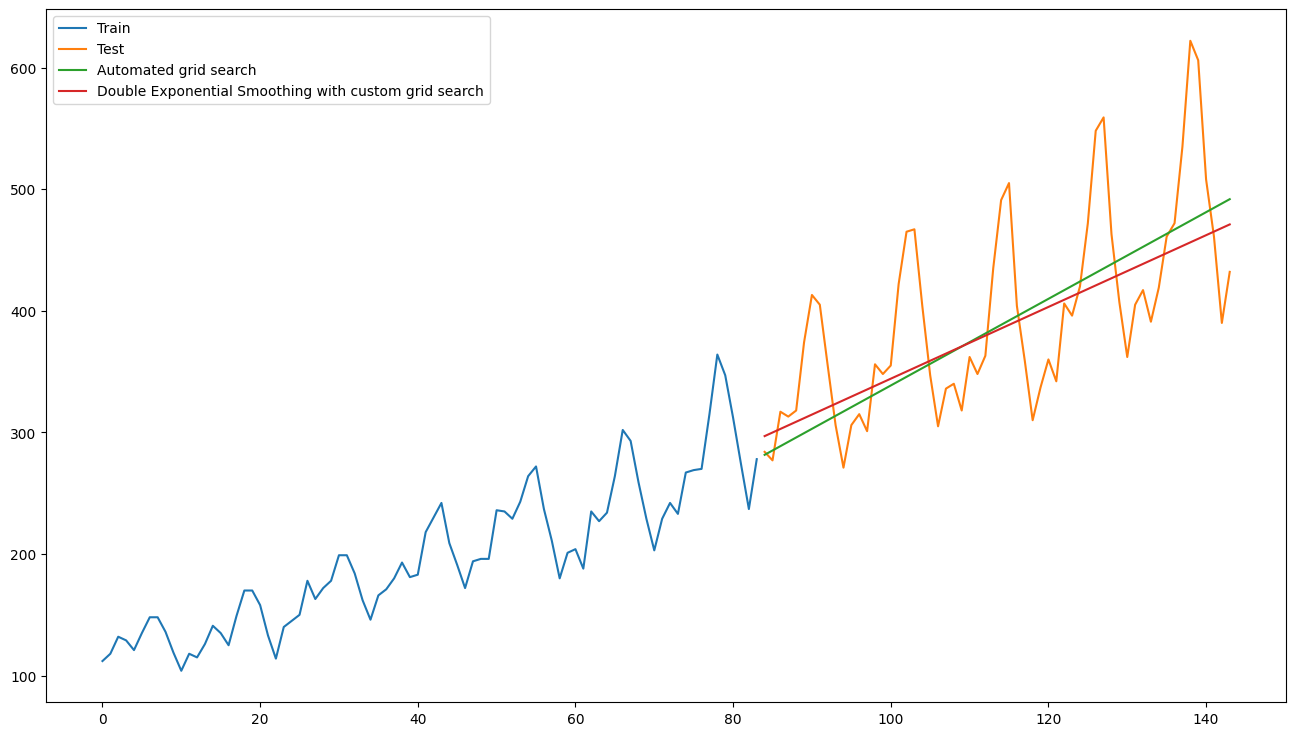

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()


### Since Double smoothing takes 2 parameters into account, it is now forecasting slightly better.

# **Triple Exponential Smoothing**



1.   Also called as Holt Winter’s Exponential Smoothing.
2.   Forecasting method that enforces exponential smoothing three times.
3.   Method can be applies with levels, trends, seasonality and noise.



In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer

In [ ]:
X = df['#Passengers']
test = X.iloc[-60:]
train = X.iloc[:-60]

In [ ]:
'''
Holt Winter’s Exponential Smoothing
Parameters:

    endog (array-like) – Time series
    trend ({"add", "mul", "additive", "multiplicative", None}, optional) – Type of trend component.
    damped (bool, optional) – Should the trend component be damped.
    seasonal ({"add", "mul", "additive", "multiplicative", None}, optional) – Type of seasonal component.
    seasonal_periods (int, optional) – The number of seasons to consider for the holt winters.
'''

'\nHolt Winter’s Exponential Smoothing\nParameters:\n\n    endog (array-like) – Time series\n    trend ({"add", "mul", "additive", "multiplicative", None}, optional) – Type of trend component.\n    damped (bool, optional) – Should the trend component be damped.\n    seasonal ({"add", "mul", "additive", "multiplicative", None}, optional) – Type of seasonal component.\n    seasonal_periods (int, optional) – The number of seasons to consider for the holt winters.\n'

In [ ]:
'''
fit Parameters:

    smoothing_level (float, optional) – The alpha value of the simple exponential smoothing, if the value is set then this value will be used as the value.
    smoothing_slope (float, optional) – The beta value of the holts trend method, if the value is set then this value will be used as the value.
    smoothing_seasonal (float, optional) – The gamma value of the holt winters seasonal method, if the value is set then this value will be used as the value.
    damping_slope (float, optional) – The phi value of the damped method, if the value is set then this value will be used as the value.
    optimized (bool, optional) – Should the values that have not been set above be optimized automatically?
    use_boxcox ({True, False, 'log', float}, optional) – Should the boxcox tranform be applied to the data first? If ‘log’ then apply the log. If float then use lambda equal to float.
    remove_bias (bool, optional) – Should the bias be removed from the forecast values and fitted values before being returned? Does this by enforcing average residuals equal to zero.
    use_basinhopping (bool, optional) – Should the opptimser try harder using basinhopping to find optimal values?
'''


"\nfit Parameters:\n\n    smoothing_level (float, optional) – The alpha value of the simple exponential smoothing, if the value is set then this value will be used as the value.\n    smoothing_slope (float, optional) – The beta value of the holts trend method, if the value is set then this value will be used as the value.\n    smoothing_seasonal (float, optional) – The gamma value of the holt winters seasonal method, if the value is set then this value will be used as the value.\n    damping_slope (float, optional) – The phi value of the damped method, if the value is set then this value will be used as the value.\n    optimized (bool, optional) – Should the values that have not been set above be optimized automatically?\n    use_boxcox ({True, False, 'log', float}, optional) – Should the boxcox tranform be applied to the data first? If ‘log’ then apply the log. If float then use lambda equal to float.\n    remove_bias (bool, optional) – Should the bias be removed from the forecast val

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = {'trend': ['add', 'mul'],'seasonal' :['add', 'mul'],'seasonal_periods':[3,6,12], 'smoothing_level': [0.10, 0.20,.30], 'smoothing_slope':[0.10, 0.20,.30],
              'damping_slope': [0.10, 0.20,.30],'damped' : [True, False], 'use_boxcox':[True, False],
             'remove_bias':[True, False],'use_basinhopping':[True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
!pip install tqdm

In [ ]:
from tqdm.notebook import tqdm
df_results_moni = pd.DataFrame(columns=['trend','seasonal_periods','smoothing_level', 'smoothing_slope',
                                        'damping_slope','damped','use_boxcox','remove_bias','use_basinhopping','RMSE','r2'])
start = timer()
print('Starting Grid Search..')
for a,b in enumerate(tqdm(pg)):
    trend = b.get('trend')
    smoothing_level = b.get('smoothing_level')
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    use_boxcox = b.get('use_boxcox')
    remove_bias = b.get('remove_bias')
    use_basinhopping = b.get('use_basinhopping')
    #print(trend,smoothing_level, smoothing_slope,damping_slope,damped,use_boxcox,remove_bias,use_basinhopping)
    fit1 = ExponentialSmoothing(train,trend=trend, damped=damped,seasonal_periods=seasonal_periods ).fit(smoothing_level=smoothing_level,smoothing_slope=smoothing_slope, damping_slope = damping_slope,optimized=False)
    #fit1.summary
    z = fit1.forecast(60)
    #print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    #print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'trend':trend,'seasonal_periods':seasonal_periods,'smoothing_level':smoothing_level, 'smoothing_slope':smoothing_slope,
                                        'damping_slope':damping_slope,'damped':damped,'use_boxcox':use_boxcox,'use_basinhopping':use_basinhopping,'RMSE':RMSE,'r2':r2}, ignore_index=True)
print('End of Grid Search')
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


Starting Grid Search..


  0%|          | 0/5184 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
<ipython-input-37-03a06be1a9ec>:18: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = ExponentialSmoothing(train,trend=trend, damped=damped,seasonal_periods=seasonal_periods ).fit(smoothing_level=smoothing_level,smoothing_slope=smoothing_slope, damping_slope = damping_slope,optimized=False)
<ipython-input-37-03a06be1a9ec>:18: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = ExponentialSmoothing(train,trend=trend, damped=damped,seasonal_periods=seasonal_periods ).fit(smoothing_level=smoothing_level,smoothing_slope=smoothing_slope, damping_slope = damping_slope,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-37-03a06be1a9ec>:26: FutureWarning: The frame.append method is deprec

End of Grid Search
 Total time taken to complete grid search in seconds: 108.284834254


<ipython-input-37-03a06be1a9ec>:18: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = ExponentialSmoothing(train,trend=trend, damped=damped,seasonal_periods=seasonal_periods ).fit(smoothing_level=smoothing_level,smoothing_slope=smoothing_slope, damping_slope = damping_slope,optimized=False)
<ipython-input-37-03a06be1a9ec>:18: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = ExponentialSmoothing(train,trend=trend, damped=damped,seasonal_periods=seasonal_periods ).fit(smoothing_level=smoothing_level,smoothing_slope=smoothing_slope, damping_slope = damping_slope,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-37-03a06be1a9ec>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


trend seasonal_periods  smoothing_level  smoothing_slope  damping_slope  \
2644   mul                3              0.3              0.1            0.1   

     damped use_boxcox remove_bias use_basinhopping       RMSE        r2  
2644  False       True         NaN             True  61.933186  0.401521

In [ ]:
df_results_moni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5184 entries, 0 to 5183
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trend             5184 non-null   object 
 1   seasonal_periods  5184 non-null   object 
 2   smoothing_level   5184 non-null   float64
 3   smoothing_slope   5184 non-null   float64
 4   damping_slope     5184 non-null   float64
 5   damped            5184 non-null   object 
 6   use_boxcox        5184 non-null   object 
 7   remove_bias       0 non-null      object 
 8   use_basinhopping  5184 non-null   object 
 9   RMSE              5184 non-null   float64
 10  r2                5184 non-null   float64
dtypes: float64(5), object(6)
memory usage: 445.6+ KB


In [ ]:
fit1 = ExponentialSmoothing(train,trend='mul', damped=False,seasonal_periods=3 ).fit(smoothing_level=0.3,
                                    smoothing_slope=0.1, damping_slope = 0.1,optimized=False)
Forecast_custom_pred = fit1.forecast(60)
fit1.summary()

<ipython-input-43-ca8e3e2b1cbf>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = ExponentialSmoothing(train,trend='mul', damped=False,seasonal_periods=3 ).fit(smoothing_level=0.3,
<ipython-input-43-ca8e3e2b1cbf>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = ExponentialSmoothing(train,trend='mul', damped=False,seasonal_periods=3 ).fit(smoothing_level=0.3,


<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:              #Passengers   No. Observations:                   84
Model:             ExponentialSmoothing   SSE                          70701.712
Optimized:                        False   AIC                            573.774
Trend:                   Multiplicative   BIC                            583.498
Seasonal:                          None   AICC                           574.865
Seasonal Periods:                  None   Date:                 Fri, 03 Nov 2023
Box-Cox:                          False   Time:                         18:09:25
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3000000                alpha                False
smoothing_trend            0.1000000                 beta                False
initial_level              118.46667                  l.0                False
initial_trend              1.0173940                  b.0                False
------------------------------------------------------------------------------
"""

In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 3835.7195333429418
MAE is : 48.858303273394135
RMSE is : 61.93318604224186
MAPE is : 11.851042768218392
R2 is : 0.4015209282740586



In [ ]:
# Fitting model with optimized =True
fitESAUTO = ExponentialSmoothing(train).fit(optimized= True, use_brute = True)

In [ ]:
fitESAUTO.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       ExponentialSmoothing Model Results                       
================================================================================
Dep. Variable:              #Passengers   No. Observations:                   84
Model:             ExponentialSmoothing   SSE                          37924.000
Optimized:                         True   AIC                            517.452
Trend:                             None   BIC                            522.314
Seasonal:                          None   AICC                           517.958
Seasonal Periods:                  None   Date:                 Fri, 03 Nov 2023
Box-Cox:                          False   Time:                         18:09:32
Box-Cox Coeff.:                    None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level              111.99983                  l.0                 True
------------------------------------------------------------------------------
"""

In [ ]:
fitESAUTOpred = fitESAUTO.forecast(60)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 20435.566811381846
MAE is : 118.70000057022591
RMSE is : 142.9530230928393
MAPE is : 27.274124533267397
R2 is : -2.1885175517017625



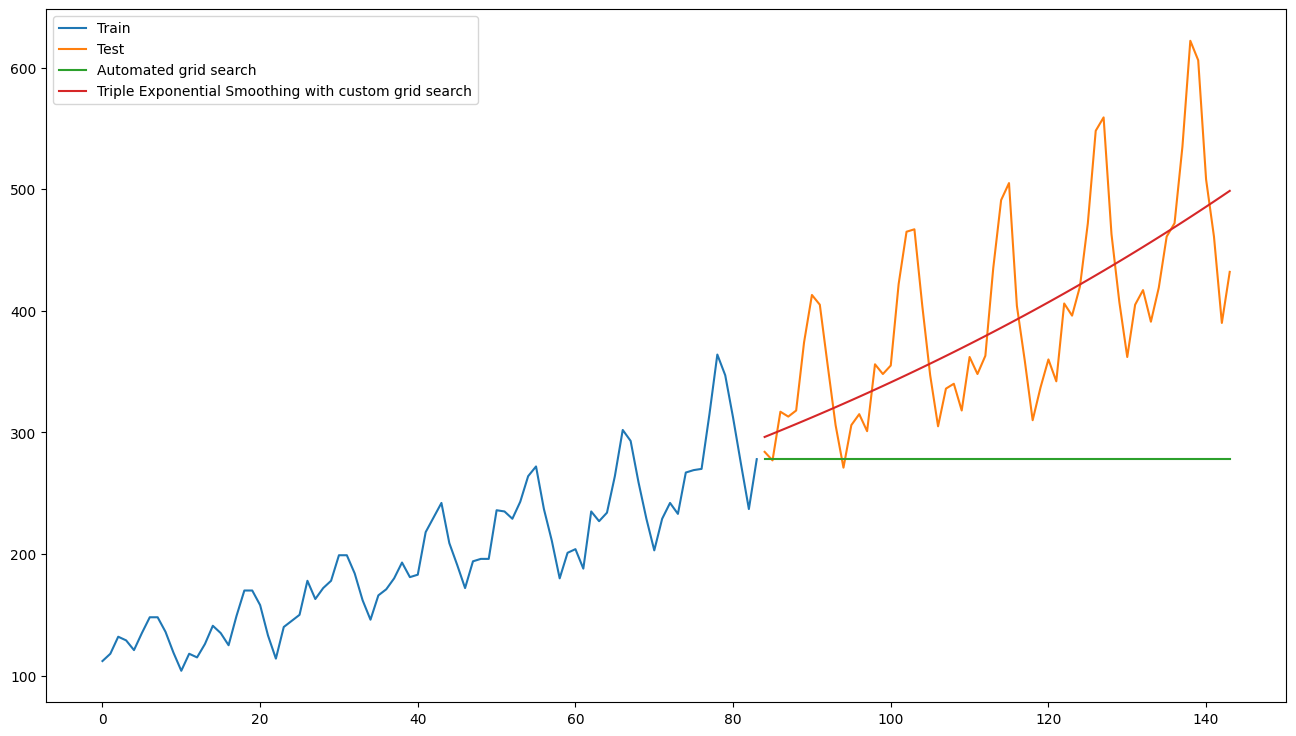

In [ ]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Triple Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

### We can now see that Triple Exponential Smoothening with customgrid search fits the line the best since it has 3 parameters